# Contents
- [Imports](#Imports)
- [Parameters](#Parameters)
- [Scans](#Scans)
- [Plot_alpha](#Plot_alpha)
- [Plot_1Ds](#Plot_1Ds)
- [Debugging](#Debugging)

# Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from arc import *
from time import time
from scipy.optimize import curve_fit
from typing import List, Dict

from basics import *
from utility import *
from floquet_hamiltonian import *

pi=np.pi
tau=2*pi

# Parameters

In [2]:
basis = None
levels = None
basis_n = None

energies = None
eigenstates = None
# Computational Parameters
t_level = RydStateFS(52,1,3/2)
max_det = tau*30e9  # radians/s
dl = 1
n_max = 3

comp = {
    "max_det": max_det,
    "dl": dl,
    "n_max": n_max
}

In [25]:
# Physical Parameters
Edc = 0  # V/m
Eac = 26 # 19.5  # V/m
ellipticity = 0.0 # 0.027
# field_omega = tau*4.780e9  #radians/s
field_omega = detuning(RydStateFS(51,2,3/2), t_level,0)+250e6*tau  #radians/s
theta = 0.0*pi/2  # angle between quantization axis and electric field (radians)

Eac_list = None
Edc_list = None
ellip_list = None
theta_list = None

fields = {
    "Eac": Eac,
    "ellipticity": ellipticity,
    "field_omega": field_omega,
    "Edc": Edc,
    "theta": theta
}

Edc_list = np.linspace(0,20,200)  # V/m
#Eac_list = np.linspace(0,50,200)  # V/m
#ellip_list = np.linspace(0,np.sqrt(0.07),100)**2
#theta_list = np.linspace(0,pi,100)

if Edc_list is not None:
    varied = ("Edc", Edc_list)
elif Eac_list is not None:
    varied = ("Eac", Eac_list)
elif ellip_list is not None:
    varied = ("ellipticity", ellip_list)
elif theta_list is not None:
    varied = ("theta", theta_list)

# Scans

In [26]:
if energies is not None or eigenstates is not None:
    energies = None
    eigenstates = None
if basis is None or levels is None:
    levels, basis = build_basis(t_level,max_det,single_side=False, dl=dl)
if basis_n is None:
    basis_n = build_n_basis(basis, n_max)

fields_p = {key: value for key, value in fields.items()}
fields_p[varied[0]] = varied[1]
old_scans = eigen_find(t_level,comp, fields_p)
loading = False
# TODO : this is broken rn. Implement eigen_terpolate then fix this.
if loading and len(old_scans) > 0: 
    energies = np.load(old_scans[0][0].format("energies"))
    eigenstates = np.load(old_scans[0][0].format("eigenstates"))
else:
    H0 = build_H0(basis, t_level, offset_zeeman=1e6)
    energies, eigenstates = floquet_loop(
        basis,
        H0,
        n_max=n_max,
        varied=varied,
        **fields
    )
    
    eigen_save(t_level, comp, fields_p, energies, eigenstates)

{'Eac': array([  0.        ,   0.60301508,   1.20603015,   1.80904523,
         2.4120603 ,   3.01507538,   3.61809045,   4.22110553,
         4.8241206 ,   5.42713568,   6.03015075,   6.63316583,
         7.2361809 ,   7.83919598,   8.44221106,   9.04522613,
         9.64824121,  10.25125628,  10.85427136,  11.45728643,
        12.06030151,  12.66331658,  13.26633166,  13.86934673,
        14.47236181,  15.07537688,  15.67839196,  16.28140704,
        16.88442211,  17.48743719,  18.09045226,  18.69346734,
        19.29648241,  19.89949749,  20.50251256,  21.10552764,
        21.70854271,  22.31155779,  22.91457286,  23.51758794,
        24.12060302,  24.72361809,  25.32663317,  25.92964824,
        26.53266332,  27.13567839,  27.73869347,  28.34170854,
        28.94472362,  29.54773869,  30.15075377,  30.75376884,
        31.35678392,  31.95979899,  32.56281407,  33.16582915,
        33.76884422,  34.3718593 ,  34.97487437,  35.57788945,
        36.18090452,  36.7839196 ,  37.38693467

Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.002987384796142578
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002987384796142578 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.04476785659790039s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.050746917724609375s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding good eigenvectors for |

C:\Users\Juan\Repos\two_photon_rydberg\floquet_hamiltonian.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[inds[:, 1], i] = eigenvalues[inds[:, 0]]


Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.05052447319030762s
Diagonalization complete for independent variable entry, value 2, 0.20100502512562815
re-arrangement done after time 0.0019943714141845703s
little_d built in 0.0039556026458740234
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0039556026458740234 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.30150753768844224, theta 0.0
Diagonalized after time: 0.04488539695739746s
Normalization Complete after 0.0009920597076416016 s
floquet_diag call completed in 0.049833059310913086s
Diagonalization complete for independent variable entry, value 3, 0.30150753768844224
re-arrangement done after time 0.0019600391387939453s
little_d built in 0.0030241012573242188
Hdc built in 0.001005411148071289
Hfloquet put together in 0.0
Floquet matrix built after 0.004029512

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.8090452261306533, theta 0.0
Diagonalized after time: 0.04320192337036133s
Normalization Complete after 0.001954793930053711 s
floquet_diag call completed in 0.04915261268615723s
Diagonalization complete for independent variable entry, value 18, 1.8090452261306533
re-arrangement done after time 0.003027200698852539s
little_d built in 0.002996206283569336
Hdc built in 0.0010025501251220703
Hfloquet put together in 0.0
Floquet matrix built after 0.003998756408691406 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.9095477386934674, theta 0.0
Diagonalized after time: 0.0439608097076416s
Normalization Complete after 0.001993417739868164 s
floquet_diag call completed in 0.04995298385620117s
Diagonalization complete for independent variable entry, va

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.4170854271356785, theta 0.0
Diagonalized after time: 0.04392290115356445s
Normalization Complete after 0.001995086669921875 s
floquet_diag call completed in 0.04890942573547363s
Diagonalization complete for independent variable entry, value 34, 3.4170854271356785
re-arrangement done after time 0.002992868423461914s
little_d built in 0.0030329227447509766
Hdc built in 0.0
Hfloquet put together in 0.0009546279907226562
Floquet matrix built after 0.003987550735473633 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.5175879396984926, theta 0.0
Diagonalized after time: 0.0468745231628418s
Normalization Complete after 0.0020279884338378906 s
floquet_diag call completed in 0.05289006233215332s
Diagonalization complete for independent variable entry, 

Normalization Complete after 0.0020258426666259766 s
floquet_diag call completed in 0.04985451698303223s
Diagonalization complete for independent variable entry, value 50, 5.025125628140704
re-arrangement done after time 0.0029599666595458984s
little_d built in 0.003026247024536133
Hdc built in 0.000993967056274414
Hfloquet put together in 0.0
Floquet matrix built after 0.004020214080810547 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.125628140703518, theta 0.0
Diagonalized after time: 0.04418349266052246s
Normalization Complete after 0.0020356178283691406 s
floquet_diag call completed in 0.05023932456970215s
Diagonalization complete for independent variable entry, value 51, 5.125628140703518
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.00295257568359375
Hdc built in 0.0010309219360351562
Hfloquet put together in 0.0
Floquet matrix built after 0

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.633165829145729, theta 0.0
Diagonalized after time: 0.04385876655578613s
Normalization Complete after 0.0009675025939941406 s
floquet_diag call completed in 0.04984784126281738s
Diagonalization complete for independent variable entry, value 66, 6.633165829145729
re-arrangement done after time 0.002955198287963867s
little_d built in 0.003988504409790039
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988504409790039 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.733668341708543, theta 0.0
Diagonalized after time: 0.04398751258850098s
Normalization Complete after 0.0019953250885009766 s
floquet_diag call completed in 0.04997134208679199s
Diagonalization complete for independent variable entry, value 67, 6.73366834

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.241206030150755, theta 0.0
Diagonalized after time: 0.04466104507446289s
Normalization Complete after 0.001961946487426758 s
floquet_diag call completed in 0.051611900329589844s
Diagonalization complete for independent variable entry, value 82, 8.241206030150755
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003989219665527344 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.341708542713569, theta 0.0
Diagonalized after time: 0.0440061092376709s
Normalization Complete after 0.001997232437133789 s
floquet_diag call completed in 0.04999256134033203s
Diagonalization complete for independent variable entry, value 83, 8.34170854

Normalization Complete after 0.002026796340942383 s
floquet_diag call completed in 0.04985475540161133s
Diagonalization complete for independent variable entry, value 98, 9.84924623115578
re-arrangement done after time 0.002991199493408203s
little_d built in 0.0029926300048828125
Hdc built in 0.0
Hfloquet put together in 0.001016378402709961
Floquet matrix built after 0.0040090084075927734 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 9.949748743718594, theta 0.0
Diagonalized after time: 0.04429793357849121s
Normalization Complete after 0.001995563507080078 s
floquet_diag call completed in 0.05030250549316406s
Diagonalization complete for independent variable entry, value 99, 9.949748743718594
re-arrangement done after time 0.0030319690704345703s
little_d built in 0.0029952526092529297
Hdc built in 0.0
Hfloquet put together in 0.0009531974792480469
Floquet matrix built after 0

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.457286432160805, theta 0.0
Diagonalized after time: 0.04430341720581055s
Normalization Complete after 0.002035856246948242 s
floquet_diag call completed in 0.050360918045043945s
Diagonalization complete for independent variable entry, value 114, 11.457286432160805
re-arrangement done after time 0.002995014190673828s
little_d built in 0.002948284149169922
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003981113433837891 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.557788944723619, theta 0.0
Diagonalized after time: 0.04369187355041504s
Normalization Complete after 0.0019855499267578125 s
floquet_diag call completed in 0.05065584182739258s
Diagonalization complete for independent variable entry, value 115, 11.55

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.06532663316583, theta 0.0
Diagonalized after time: 0.04265117645263672s
Normalization Complete after 0.0019648075103759766 s
floquet_diag call completed in 0.048607587814331055s
Diagonalization complete for independent variable entry, value 130, 13.06532663316583
re-arrangement done after time 0.002988576889038086s
little_d built in 0.002991914749145508
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003989696502685547 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.165829145728644, theta 0.0
Diagonalized after time: 0.042885780334472656s
Normalization Complete after 0.001995086669921875 s
floquet_diag call completed in 0.04887056350708008s
Diagonalization complete for independent variable entry, value 131, 13.165

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.673366834170855, theta 0.0
Diagonalized after time: 0.043137311935424805s
Normalization Complete after 0.002027750015258789 s
floquet_diag call completed in 0.048158884048461914s
Diagonalization complete for independent variable entry, value 146, 14.673366834170855
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.0029866695404052734
Hdc built in 0.0
Hfloquet put together in 0.0009965896606445312
Floquet matrix built after 0.003983259201049805 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.773869346733669, theta 0.0
Diagonalized after time: 0.04355359077453613s
Normalization Complete after 0.0019969940185546875 s
floquet_diag call completed in 0.049533843994140625s
Diagonalization complete for independent variable e

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.28140703517588, theta 0.0
Diagonalized after time: 0.04354572296142578s
Normalization Complete after 0.001964092254638672 s
floquet_diag call completed in 0.04949498176574707s
Diagonalization complete for independent variable entry, value 162, 16.28140703517588
re-arrangement done after time 0.0030274391174316406s
little_d built in 0.0029883384704589844
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0039539337158203125 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.381909547738694, theta 0.0
Diagonalized after time: 0.04384922981262207s
Normalization Complete after 0.002032041549682617 s
floquet_diag call completed in 0.05083417892456055s
Diagonalization complete for independent variable entry, value 163, 16.381

Normalization Complete after 0.0019605159759521484 s
floquet_diag call completed in 0.049097537994384766s
Diagonalization complete for independent variable entry, value 178, 17.889447236180906
re-arrangement done after time 0.0029931068420410156s
little_d built in 0.003988742828369141
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988742828369141 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 17.98994974874372, theta 0.0
Diagonalized after time: 0.04234766960144043s
Normalization Complete after 0.0020248889923095703 s
floquet_diag call completed in 0.04836130142211914s
Diagonalization complete for independent variable entry, value 179, 17.98994974874372
re-arrangement done after time 0.0029914379119873047s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0040013790130615234 s
Begin 

Normalization Complete after 0.0019953250885009766 s
floquet_diag call completed in 0.04812502861022949s
Diagonalization complete for independent variable entry, value 194, 19.49748743718593
re-arrangement done after time 0.0029909610748291016s
little_d built in 0.002991914749145508
Hdc built in 0.000997781753540039
Hfloquet put together in 0.0
Floquet matrix built after 0.003989696502685547 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 26, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.597989949748744, theta 0.0
Diagonalized after time: 0.04388236999511719s
Normalization Complete after 0.0019958019256591797 s
floquet_diag call completed in 0.049867868423461914s
Diagonalization complete for independent variable entry, value 195, 19.597989949748744
re-arrangement done after time 0.0019927024841308594s
little_d built in 0.002992391586303711
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.00399088859

In [30]:
def check_polarizability(
    basis: List[RydStateFS], 
    H0: np.ndarray,
    dc_end: float, 
    samples: int,
    comp: Dict[str, int],
    fields: Dict[str, float]
) -> np.ndarray:
    """
    Determines the polarizability of all states in basis for AC/DC field parameters
    provided in fields dict.
    
    Args:
        basis: list of atomic states considered in computation
        H0: Hamiltonian of unperturbed atom system (expected to be diagonal). Matrix
            elements should be reported in radial frequency (radians/s)
        dc_end: maximum electric field strength to be sampled. dc electric field values
            are sampled from 0 to dc_end
        samples: number of dc electric field strength values to take. System is prone to crashing when
            too few samples are provided. Stable for when 100 samples per 20 volt span
        fields: dict of AC and DC field values. Currently the following parameters are expected
            to be represented in fields:
                "Eac" : Electric field strength of the AC field (V/m)
                "ellipticity" : ellipticity of the AC field. Field polarization defined as
                    e_ac = sqrt(1-ellipticity)e_pi + sqrt(ellipticity)e_+
                "field_omega" : oscillation frequency of the AC. Reported in radial frequency (radians/s)
                "Edc" : Ignored if included in fields dict
                "theta" : angle between quantization axis and electric field direction (radians)
        comp: dict of computational parameters used for this computation. Keys:
            "max_det" : float, maximum energy difference between t_level and any level included
                in the basis used in the computation
            "dl" : int, maximum difference between t_level.l and the orbital angular momentum
                quantum number of other states in the basis, |l-lp| <= dl
            "n_max" : int, maximum number of fourier components of the AC field to include in the
                computation
    """
    dcs = ("Edc", np.linspace(0,dc_end,samples))
    energies, eigenstates = floquet_loop(basis, H0, n_max=comp["n_max"], varied = dcs, **fields)
    
    quad = lambda v, v0, alpha, e0: alpha*(v-v0)**2+e0
    
    dim = len(basis)*(2*n_max+1)
    alphas = np.zeros(dim, dtype=float)
    dalphas = np.zeros(dim, dtype=float)
    for i in range(dim):
        band_energies = energies[i,:]
        guess = guess = [0.0, (band_energies[-1]-band_energies[samples//2])/dc_end**2, band_energies[samples//2]]
        try:
            popt, pcov = curve_fit(quad, dcs[1], band_energies, p0 = guess)
            perr = np.sqrt(np.diag(pcov))

            alphas[i] = popt[1]
            dalphas[i] = perr[1]
        except RuntimeError:
            alphas[i] = np.NaN
            dalphas[i] = np.NaN    
    fields["Edc"] = dcs[1]
    eigen_save(t_level, comp, fields, energies, eigenstates)
    del energies
    del eigenstates
    return alphas, dalphas

H0 = build_H0(basis,t_level, offset_zeeman=1e6)
samples = 100
Emax = 20
Eacs = np.linspace(19,35,15)  # V/m
alphas = np.zeros((len(Eacs),len(basis)*(2*n_max+1)),dtype=float)
dalphas = np.zeros((len(Eacs),len(basis)*(2*n_max+1)),dtype=float)
# failed = False
for i, eac in enumerate(Eacs):
    fields["Eac"] = eac
    try:
        alphas[i], dalphas[i] = check_polarizability(basis, H0, Emax, samples, comp, fields)
    except ValueError:
        print(f"WARNING: failed to check polarizability for field values :\n{fields}")
    # If one point fails try again on the next point. If two in a row fail, raise the error
        alphas[i] = np.NaN
        dalphas[i] = np.NaN

140
Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.002991914749145508
Hdc built in 0.0009980201721191406
Hfloquet put together in 0.0
Floquet matrix built after 0.0039899349212646484 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.04391765594482422s
Normalization Complete after 0.002033233642578125 s
floquet_diag call completed in 0.04994082450866699s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding 

C:\Users\Juan\Repos\two_photon_rydberg\floquet_hamiltonian.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[inds[:, 1], i] = eigenvalues[inds[:, 0]]


Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.40404040404040403, theta 0.0
Diagonalized after time: 0.04481077194213867s
Normalization Complete after 0.0009636878967285156 s
floquet_diag call completed in 0.05076026916503906s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.0029942989349365234
Hdc built in 0.0
Hfloquet put together in 0.000997304916381836
Floquet matrix built after 0.003991603851318359 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.04420971870422363s
Normalization Complete after 0.0020384788513183594 s
floquet_diag call completed in 0.05023980140686035s
Diagonalization complete for independent variable 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.6363636363636362, theta 0.0
Diagonalized after time: 0.04326915740966797s
Normalization Complete after 0.0020360946655273438 s
floquet_diag call completed in 0.04929494857788086s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029501914978027344s
little_d built in 0.003036022186279297
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.004029512405395508 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.04406571388244629s
Normalization Complete after 0.001962423324584961 s
floquet_diag call completed in 0.05005764961242676s
Diagonalization complete for independent variable entry, value 19, 3.8

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.8686868686868685, theta 0.0
Diagonalized after time: 0.043825387954711914s
Normalization Complete after 0.0019931793212890625 s
floquet_diag call completed in 0.05080771446228027s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.001995086669921875s
little_d built in 0.003988742828369141
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988742828369141 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.043599605560302734s
Normalization Complete after 0.0029914379119873047 s
floquet_diag call completed in 0.05057978630065918s
Diagonalization complete for independent variable entry, value 35, 7.

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.1010101010101, theta 0.0
Diagonalized after time: 0.043845176696777344s
Normalization Complete after 0.003033876419067383 s
floquet_diag call completed in 0.04987621307373047s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.0029838085174560547s
little_d built in 0.002999544143676758
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002999544143676758 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.04384136199951172s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.0498652458190918s
Diagonalization complete for independent variable entry, value 51, 10.3030

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.333333333333334, theta 0.0
Diagonalized after time: 0.04435563087463379s
Normalization Complete after 0.0019519329071044922 s
floquet_diag call completed in 0.05029702186584473s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.0030379295349121094s
little_d built in 0.0029876232147216797
Hdc built in 0.0010013580322265625
Hfloquet put together in 0.0
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.042540788650512695s
Normalization Complete after 0.0020275115966796875 s
floquet_diag call completed in 0.048557281494140625s
Diagonalization complete for independent variabl

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.565656565656564, theta 0.0
Diagonalized after time: 0.04391288757324219s
Normalization Complete after 0.001992464065551758 s
floquet_diag call completed in 0.04990792274475098s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.0029981136322021484s
little_d built in 0.0029876232147216797
Hdc built in 0.0
Hfloquet put together in 0.0009951591491699219
Floquet matrix built after 0.0039827823638916016 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.043842315673828125s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.04985237121582031s
Diagonalization complete for independent variable 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.7979797979798, theta 0.0
Diagonalized after time: 0.04332709312438965s
Normalization Complete after 0.0020308494567871094 s
floquet_diag call completed in 0.04938006401062012s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.0029556751251220703s
little_d built in 0.0030336380004882812
Hdc built in 0.0010044574737548828
Hfloquet put together in 0.0
Floquet matrix built after 0.004038095474243164 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 19.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.04298210144042969s
Normalization Complete after 0.0019936561584472656 s
floquet_diag call completed in 0.04901385307312012s
Diagonalization complete for independent variable entry, value 99, 2

c:\users\juan\envs\rydberg\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


140
Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.003988981246948242
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.004985809326171875 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.045655250549316406s
Normalization Complete after 0.0019958019256591797 s
floquet_diag call completed in 0.05263686180114746s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding goo

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.0202020202020203, theta 0.0
Diagonalized after time: 0.043028831481933594s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.05005192756652832s
Diagonalization complete for independent variable entry, value 10, 2.0202020202020203
re-arrangement done after time 0.0029838085174560547s
little_d built in 0.003000974655151367
Hdc built in 0.0
Hfloquet put together in 0.0009970664978027344
Floquet matrix built after 0.0039980411529541016 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.2222222222222223, theta 0.0
Diagonalized after time: 0.04253029823303223s
Normalization Complete after 0.0019659996032714844 s
floquet_diag call completed in 0.04849433898925781s
Diagonalization compl

Normalization Complete after 0.0019600391387939453 s
floquet_diag call completed in 0.05002713203430176s
Diagonalization complete for independent variable entry, value 26, 5.252525252525253
re-arrangement done after time 0.0029892921447753906s
little_d built in 0.002991914749145508
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003989219665527344 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.454545454545454, theta 0.0
Diagonalized after time: 0.04180455207824707s
Normalization Complete after 0.0020301342010498047 s
floquet_diag call completed in 0.04882359504699707s
Diagonalization complete for independent variable entry, value 27, 5.454545454545454
re-arrangement done after time 0.002988576889038086s
little_d built in 0.0029931068420410156
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.00299310684204101

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.484848484848484, theta 0.0
Diagonalized after time: 0.04385089874267578s
Normalization Complete after 0.0019969940185546875 s
floquet_diag call completed in 0.04887080192565918s
Diagonalization complete for independent variable entry, value 42, 8.484848484848484
re-arrangement done after time 0.002990245819091797s
little_d built in 0.0030243396759033203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0030243396759033203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.686868686868687, theta 0.0
Diagonalized after time: 0.043482303619384766s
Normalization Complete after 0.0020360946655273438 s
floquet_diag call completed in 0.04854273796081543s
Diagonalization complete for independent v

Normalization Complete after 0.001997232437133789 s
floquet_diag call completed in 0.04856419563293457s
Diagonalization complete for independent variable entry, value 58, 11.717171717171716
re-arrangement done after time 0.0019943714141845703s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0009653568267822266
Floquet matrix built after 0.003957509994506836 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.919191919191919, theta 0.0
Diagonalized after time: 0.042954444885253906s
Normalization Complete after 0.001996755599975586 s
floquet_diag call completed in 0.04890871047973633s
Diagonalization complete for independent variable entry, value 59, 11.919191919191919
re-arrangement done after time 0.0024979114532470703s
little_d built in 0.0030307769775390625
Hdc built in 0.0009903907775878906
Hfloquet put together in 0.0
Floque

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.94949494949495, theta 0.0
Diagonalized after time: 0.04302549362182617s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.049016714096069336s
Diagonalization complete for independent variable entry, value 74, 14.94949494949495
re-arrangement done after time 0.002992391586303711s
little_d built in 0.0029926300048828125
Hdc built in 0.0
Hfloquet put together in 0.0009963512420654297
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 15.15151515151515, theta 0.0
Diagonalized after time: 0.043131351470947266s
Normalization Complete after 0.0019953250885009766 s
floquet_diag call completed in 0.049115657806396484s
Diagonalization complet

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.18181818181818, theta 0.0
Diagonalized after time: 0.04336142539978027s
Normalization Complete after 0.0019958019256591797 s
floquet_diag call completed in 0.0493471622467041s
Diagonalization complete for independent variable entry, value 90, 18.18181818181818
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0039904117584228516 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 20.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.383838383838384, theta 0.0
Diagonalized after time: 0.04388093948364258s
Normalization Complete after 0.0019953250885009766 s
floquet_diag call completed in 0.049866676330566406s
Diagonalization complete for independent 

AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.40404040404040403, theta 0.0
Diagonalized after time: 0.04289579391479492s
Normalization Complete after 0.0019965171813964844 s
floquet_diag call completed in 0.048889875411987305s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.0029892921447753906s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0009660720825195312
Floquet matrix built after 0.00399017333984375 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.043244361877441406s
Normalization Complete after 0.001992464065551758 s
floquet_diag call completed in 0.049226999282836914s
Diagonalization complete for independent variable entry, value 3, 0

Normalization Complete after 0.002028226852416992 s
floquet_diag call completed in 0.04890084266662598s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029573440551757812s
little_d built in 0.0030269622802734375
Hdc built in 0.0010039806365966797
Hfloquet put together in 0.0
Floquet matrix built after 0.004030942916870117 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.04384160041809082s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.049866437911987305s
Diagonalization complete for independent variable entry, value 19, 3.8383838383838382
re-arrangement done after time 0.003025054931640625s
little_d built in 0.002960681915283203
Hdc built in 0.0
Hfloquet put together in 0.0010385513305664062
Floquet 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.8686868686868685, theta 0.0
Diagonalized after time: 0.04401659965515137s
Normalization Complete after 0.001963376998901367 s
floquet_diag call completed in 0.0500028133392334s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.0030269622802734375s
little_d built in 0.0029578208923339844
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029578208923339844 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.04242110252380371s
Normalization Complete after 0.0020265579223632812 s
floquet_diag call completed in 0.04740548133850098s
Diagonalization complete for independent v

Normalization Complete after 0.0020313262939453125 s
floquet_diag call completed in 0.05094408988952637s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.0029866695404052734s
little_d built in 0.002992868423461914
Hdc built in 0.0
Hfloquet put together in 0.0010142326354980469
Floquet matrix built after 0.004007101058959961 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.042855262756347656s
Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.049887895584106445s
Diagonalization complete for independent variable entry, value 51, 10.303030303030303
re-arrangement done after time 0.0019958019256591797s
little_d built in 0.0029594898223876953
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built aft

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.333333333333334, theta 0.0
Diagonalized after time: 0.04559135437011719s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.05057978630065918s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.001995086669921875s
little_d built in 0.002992391586303711
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002992391586303711 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.04328012466430664s
Normalization Complete after 0.0020275115966796875 s
floquet_diag call completed in 0.04830002784729004s
Diagonalization complete for independent va

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.565656565656564, theta 0.0
Diagonalized after time: 0.04346942901611328s
Normalization Complete after 0.0020265579223632812 s
floquet_diag call completed in 0.048522233963012695s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.0030002593994140625s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0009968280792236328
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.043085575103759766s
Normalization Complete after 0.0020275115966796875 s
floquet_diag call completed in 0.049102067947387695s
Diagonalization com

Normalization Complete after 0.0019910335540771484 s
floquet_diag call completed in 0.04847574234008789s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.001996755599975586s
little_d built in 0.0029921531677246094
Hdc built in 0.0009617805480957031
Hfloquet put together in 0.0
Floquet matrix built after 0.0039539337158203125 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 21.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.043437957763671875s
Normalization Complete after 0.001994609832763672 s
floquet_diag call completed in 0.04938650131225586s
Diagonalization complete for independent variable entry, value 99, 20.0
re-arrangement done after time 0.002991914749145508s
140
Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.0029516220092773438
Hdc b

Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.04958510398864746s
Diagonalization complete for independent variable entry, value 10, 2.0202020202020203
re-arrangement done after time 0.0029587745666503906s
little_d built in 0.003023862838745117
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003023862838745117 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.2222222222222223, theta 0.0
Diagonalized after time: 0.04259824752807617s
Normalization Complete after 0.001994609832763672 s
floquet_diag call completed in 0.04761672019958496s
Diagonalization complete for independent variable entry, value 11, 2.2222222222222223
re-arrangement done after time 0.0030264854431152344s
little_d built in 0.0029900074005126953
Hdc built in 0.0
Hfloquet put together in 0.0009653568267822266
Floquet matrix built afte

Normalization Complete after 0.002991914749145508 s
floquet_diag call completed in 0.04971146583557129s
Diagonalization complete for independent variable entry, value 26, 5.252525252525253
re-arrangement done after time 0.0019958019256591797s
little_d built in 0.0029916763305664062
Hdc built in 0.0009975433349609375
Hfloquet put together in 0.0
Floquet matrix built after 0.003989219665527344 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.454545454545454, theta 0.0
Diagonalized after time: 0.04292631149291992s
Normalization Complete after 0.0019528865814208984 s
floquet_diag call completed in 0.048868417739868164s
Diagonalization complete for independent variable entry, value 27, 5.454545454545454
re-arrangement done after time 0.002992391586303711s
little_d built in 0.0030226707458496094
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 

Normalization Complete after 0.0019676685333251953 s
floquet_diag call completed in 0.04896187782287598s
Diagonalization complete for independent variable entry, value 42, 8.484848484848484
re-arrangement done after time 0.002995729446411133s
little_d built in 0.003021240234375
Hdc built in 0.0
Hfloquet put together in 0.00099945068359375
Floquet matrix built after 0.00402069091796875 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.686868686868687, theta 0.0
Diagonalized after time: 0.04393815994262695s
Normalization Complete after 0.0020275115966796875 s
floquet_diag call completed in 0.04998636245727539s
Diagonalization complete for independent variable entry, value 43, 8.686868686868687
re-arrangement done after time 0.0029914379119873047s
little_d built in 0.0029604434967041016
Hdc built in 0.0010318756103515625
Hfloquet put together in 0.0
Floquet matrix b

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.717171717171716, theta 0.0
Diagonalized after time: 0.044234514236450195s
Normalization Complete after 0.0009951591491699219 s
floquet_diag call completed in 0.04922080039978027s
Diagonalization complete for independent variable entry, value 58, 11.717171717171716
re-arrangement done after time 0.001992940902709961s
little_d built in 0.0029985904693603516
Hdc built in 0.0
Hfloquet put together in 0.000997304916381836
Floquet matrix built after 0.0039958953857421875 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.919191919191919, theta 0.0
Diagonalized after time: 0.04490542411804199s
Normalization Complete after 0.001961231231689453 s
floquet_diag call completed in 0.05086255073547363s
Diagonalization complet

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.94949494949495, theta 0.0
Diagonalized after time: 0.04380178451538086s
Normalization Complete after 0.0019941329956054688 s
floquet_diag call completed in 0.049826860427856445s
Diagonalization complete for independent variable entry, value 74, 14.94949494949495
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.0049860477447509766
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0049860477447509766 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 15.15151515151515, theta 0.0
Diagonalized after time: 0.043886661529541016s
Normalization Complete after 0.0019614696502685547 s
floquet_diag call completed in 0.05083417892456055s
Diagonalization complete for independent

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.18181818181818, theta 0.0
Diagonalized after time: 0.04262685775756836s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04864645004272461s
Diagonalization complete for independent variable entry, value 90, 18.18181818181818
re-arrangement done after time 0.002999544143676758s
little_d built in 0.0029866695404052734
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029866695404052734 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 22.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.383838383838384, theta 0.0
Diagonalized after time: 0.04273557662963867s
Normalization Complete after 0.0020308494567871094 s
floquet_diag call completed in 0.048749685287475586s
Diagonalization complete for independent 

Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.05013108253479004s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.0029764175415039062s
little_d built in 0.0030090808868408203
Hdc built in 0.0010046958923339844
Hfloquet put together in 0.0
Floquet matrix built after 0.004013776779174805 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.04354238510131836s
Normalization Complete after 0.0019941329956054688 s
floquet_diag call completed in 0.04955029487609863s
Diagonalization complete for independent variable entry, value 3, 0.6060606060606061
re-arrangement done after time 0.0029926300048828125s
little_d built in 0.0029916763305664062
Hdc built in 0.0009984970092773438
Hfloquet put together in 0.0
Floquet 

AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.6363636363636362, theta 0.0
Diagonalized after time: 0.04449582099914551s
Normalization Complete after 0.001993417739868164 s
floquet_diag call completed in 0.05047750473022461s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029616355895996094s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.004028797149658203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.04378843307495117s
Normalization Complete after 0.0020041465759277344 s
floquet_diag call completed in 0.04982137680053711s
Diagonalization complete for independent variable entry, value 19, 3.8383838383838382
re-a

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.8686868686868685, theta 0.0
Diagonalized after time: 0.044920921325683594s
Normalization Complete after 0.002041339874267578 s
floquet_diag call completed in 0.04995226860046387s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.0029458999633789062s
little_d built in 0.0030214786529541016
Hdc built in 0.0010004043579101562
Hfloquet put together in 0.0
Floquet matrix built after 0.004021883010864258 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.044403791427612305s
Normalization Complete after 0.002034902572631836 s
floquet_diag call completed in 0.0504605770111084s
Diagonalization complete f

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.1010101010101, theta 0.0
Diagonalized after time: 0.044027090072631836s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.05001115798950195s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.002958059310913086s
little_d built in 0.003023862838745117
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003023862838745117 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.043549537658691406s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.048567771911621094s
Diagonalization complete for independent vari

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.333333333333334, theta 0.0
Diagonalized after time: 0.04341530799865723s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.048444509506225586s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.002992391586303711s
little_d built in 0.0030248165130615234
Hdc built in 0.0009629726409912109
Hfloquet put together in 0.0
Floquet matrix built after 0.003987789154052734 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.043871164321899414s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.049886226654052734s
Diagonalization complet

Diagonalized after time: 0.04403853416442871s
Normalization Complete after 0.002025604248046875 s
floquet_diag call completed in 0.05005812644958496s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.0029594898223876953s
little_d built in 0.003025531768798828
Hdc built in 0.0
Hfloquet put together in 0.0010180473327636719
Floquet matrix built after 0.0040435791015625 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.04282999038696289s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.04890084266662598s
Diagonalization complete for independent variable entry, value 83, 16.767676767676768
re-arrangement done after time 0.002991914749145508s
little_d built in 0.0029926300048828125
Hdc built in 0.0
Hfloquet put 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.7979797979798, theta 0.0
Diagonalized after time: 0.04306197166442871s
Normalization Complete after 0.0019958019256591797 s
floquet_diag call completed in 0.04904747009277344s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.003033876419067383s
little_d built in 0.00299072265625
Hdc built in 0.0009572505950927734
Hfloquet put together in 0.0
Floquet matrix built after 0.0039479732513427734 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 23.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.04362320899963379s
Normalization Complete after 0.002029895782470703 s
floquet_diag call completed in 0.049601078033447266s
Diagonalization complete for independent variab

Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.04900765419006348s
Diagonalization complete for independent variable entry, value 10, 2.0202020202020203
re-arrangement done after time 0.0029573440551757812s
little_d built in 0.0030243396759033203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0030243396759033203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.2222222222222223, theta 0.0
Diagonalized after time: 0.04391002655029297s
Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.048963069915771484s
Diagonalization complete for independent variable entry, value 11, 2.2222222222222223
re-arrangement done after time 0.002958059310913086s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0010304450988769531
Floquet matrix built a

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.252525252525253, theta 0.0
Diagonalized after time: 0.04393887519836426s
Normalization Complete after 0.0020194053649902344 s
floquet_diag call completed in 0.04994010925292969s
Diagonalization complete for independent variable entry, value 26, 5.252525252525253
re-arrangement done after time 0.002991199493408203s
little_d built in 0.002992868423461914
Hdc built in 0.0009725093841552734
Hfloquet put together in 0.0
Floquet matrix built after 0.0039653778076171875 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.454545454545454, theta 0.0
Diagonalized after time: 0.042925119400024414s
Normalization Complete after 0.0019931793212890625 s
floquet_diag call completed in 0.048883676528930664s
Diagonalization complete

Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.04927229881286621s
Diagonalization complete for independent variable entry, value 42, 8.484848484848484
re-arrangement done after time 0.002992391586303711s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003991365432739258 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.686868686868687, theta 0.0
Diagonalized after time: 0.04423975944519043s
Normalization Complete after 0.002027750015258789 s
floquet_diag call completed in 0.05025887489318848s
Diagonalization complete for independent variable entry, value 43, 8.686868686868687
re-arrangement done after time 0.002001523971557617s
little_d built in 0.0029854774475097656
Hdc built in 0.0
Hfloquet put together in 0.0010023117065429688
Floquet matrix built after 0.

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.717171717171716, theta 0.0
Diagonalized after time: 0.0431218147277832s
Normalization Complete after 0.0020284652709960938 s
floquet_diag call completed in 0.04917287826538086s
Diagonalization complete for independent variable entry, value 58, 11.717171717171716
re-arrangement done after time 0.003000974655151367s
little_d built in 0.0029985904693603516
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988742828369141 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.919191919191919, theta 0.0
Diagonalized after time: 0.04407930374145508s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.0500950813293457s
Diagonalization complete for independent va

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.94949494949495, theta 0.0
Diagonalized after time: 0.04179573059082031s
Normalization Complete after 0.0029938220977783203 s
floquet_diag call completed in 0.04877829551696777s
Diagonalization complete for independent variable entry, value 74, 14.94949494949495
re-arrangement done after time 0.003033161163330078s
little_d built in 0.0029795169830322266
Hdc built in 0.0
Hfloquet put together in 0.0009932518005371094
Floquet matrix built after 0.003972768783569336 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 15.15151515151515, theta 0.0
Diagonalized after time: 0.042963504791259766s
Normalization Complete after 0.002032041549682617 s
floquet_diag call completed in 0.04896831512451172s
Diagonalization complete f

Normalization Complete after 0.0019927024841308594 s
floquet_diag call completed in 0.0501096248626709s
Diagonalization complete for independent variable entry, value 90, 18.18181818181818
re-arrangement done after time 0.00299072265625s
little_d built in 0.002996683120727539
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002996683120727539 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 24.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.383838383838384, theta 0.0
Diagonalized after time: 0.04284977912902832s
Normalization Complete after 0.002025604248046875 s
floquet_diag call completed in 0.047872066497802734s
Diagonalization complete for independent variable entry, value 91, 18.383838383838384
re-arrangement done after time 0.0029938220977783203s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029916763305664062 

Diagonalized after time: 0.04382443428039551s
Normalization Complete after 0.0019953250885009766 s
floquet_diag call completed in 0.049809932708740234s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.0029582977294921875s
little_d built in 0.00299072265625
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.00299072265625 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.04343008995056152s
Normalization Complete after 0.0020380020141601562 s
floquet_diag call completed in 0.04845881462097168s
Diagonalization complete for independent variable entry, value 3, 0.6060606060606061
re-arrangement done after time 0.002948760986328125s
little_d built in 0.002991199493408203
Hdc built in 0.0
Hfloquet put together in 0.0
Floque

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.6363636363636362, theta 0.0
Diagonalized after time: 0.044649362564086914s
Normalization Complete after 0.003027677536010742 s
floquet_diag call completed in 0.05166816711425781s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029582977294921875s
little_d built in 0.0030243396759033203
Hdc built in 0.0
Hfloquet put together in 0.0009634494781494141
Floquet matrix built after 0.003987789154052734 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.042594194412231445s
Normalization Complete after 0.002027750015258789 s
floquet_diag call completed in 0.04860973358154297s
Diagonalization comple

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.8686868686868685, theta 0.0
Diagonalized after time: 0.043375253677368164s
Normalization Complete after 0.0019936561584472656 s
floquet_diag call completed in 0.04935908317565918s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.0029926300048828125s
little_d built in 0.003022909164428711
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003022909164428711 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.04310894012451172s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.05013537406921387s
Diagonalization complete for independent v

Normalization Complete after 0.0019936561584472656 s
floquet_diag call completed in 0.04887056350708008s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.0029926300048828125s
little_d built in 0.0029914379119873047
Hdc built in 0.0009980201721191406
Hfloquet put together in 0.0
Floquet matrix built after 0.003989458084106445 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.04491448402404785s
Normalization Complete after 0.0019941329956054688 s
floquet_diag call completed in 0.051892757415771484s
Diagonalization complete for independent variable entry, value 51, 10.303030303030303
re-arrangement done after time 0.001995086669921875s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0010085105895996094
Floquet

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.333333333333334, theta 0.0
Diagonalized after time: 0.043100833892822266s
Normalization Complete after 0.0020346641540527344 s
floquet_diag call completed in 0.04912924766540527s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.00295257568359375s
little_d built in 0.0029878616333007812
Hdc built in 0.0
Hfloquet put together in 0.000988006591796875
Floquet matrix built after 0.003975868225097656 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.04391884803771973s
Normalization Complete after 0.001996755599975586 s
floquet_diag call completed in 0.04989147186279297s
Diagonalization complete 

Diagonalized after time: 0.043561458587646484s
Normalization Complete after 0.002015352249145508 s
floquet_diag call completed in 0.04956531524658203s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.0029578208923339844s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0009999275207519531
Floquet matrix built after 0.004024028778076172 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.043189287185668945s
Normalization Complete after 0.0009958744049072266 s
floquet_diag call completed in 0.05020642280578613s
Diagonalization complete for independent variable entry, value 83, 16.767676767676768
re-arrangement done after time 0.001992940902709961s
little_d built in 0.003026247024536133
Hdc built in 0.0
Hfloque

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.7979797979798, theta 0.0
Diagonalized after time: 0.04338502883911133s
Normalization Complete after 0.001994609832763672 s
floquet_diag call completed in 0.04840707778930664s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.002036571502685547s
little_d built in 0.002992868423461914
Hdc built in 0.0009555816650390625
Hfloquet put together in 0.0
Floquet matrix built after 0.0039484500885009766 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 25.857142857142858, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.04381918907165527s
Normalization Complete after 0.001995086669921875 s
floquet_diag call completed in 0.049762725830078125s
Diagonalization complete for independent v

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.2121212121212122, theta 0.0
Diagonalized after time: 0.04584217071533203s
Normalization Complete after 0.002029895782470703 s
floquet_diag call completed in 0.051830291748046875s
Diagonalization complete for independent variable entry, value 6, 1.2121212121212122
re-arrangement done after time 0.002988100051879883s
little_d built in 0.0030307769775390625
Hdc built in 0.0
Hfloquet put together in 0.0009932518005371094
Floquet matrix built after 0.004024028778076172 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.4141414141414141, theta 0.0
Diagonalized after time: 0.04318380355834961s
Normalization Complete after 0.001950979232788086 s
floquet_diag call completed in 0.04915881156921387s
Diagonalization complete for independent variable ent

Normalization Complete after 0.001996755599975586 s
floquet_diag call completed in 0.049516916275024414s
Diagonalization complete for independent variable entry, value 22, 4.444444444444445
re-arrangement done after time 0.002991199493408203s
little_d built in 0.002991199493408203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002991199493408203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 4.646464646464646, theta 0.0
Diagonalized after time: 0.04448080062866211s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.049466848373413086s
Diagonalization complete for independent variable entry, value 23, 4.646464646464646
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.0029931068420410156
Hdc built in 0.0
Hfloquet put together in 0.0009987354278564453
Floquet matrix built after 0.003991842269

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.6767676767676765, theta 0.0
Diagonalized after time: 0.04387640953063965s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.049912214279174805s
Diagonalization complete for independent variable entry, value 38, 7.6767676767676765
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.002992391586303711
Hdc built in 0.0
Hfloquet put together in 0.000997781753540039
Floquet matrix built after 0.00399017333984375 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.878787878787879, theta 0.0
Diagonalized after time: 0.043881893157958984s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.049866437911987305s
Diagonalization complete for independent variable e

Normalization Complete after 0.0010006427764892578 s
floquet_diag call completed in 0.0491640567779541s
Diagonalization complete for independent variable entry, value 54, 10.909090909090908
re-arrangement done after time 0.0029442310333251953s
little_d built in 0.0040204524993896484
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0040204524993896484 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.11111111111111, theta 0.0
Diagonalized after time: 0.043241024017333984s
Normalization Complete after 0.002041339874267578 s
floquet_diag call completed in 0.050286054611206055s
Diagonalization complete for independent variable entry, value 55, 11.11111111111111
re-arrangement done after time 0.002001523971557617s
little_d built in 0.003983497619628906
Hdc built in 0.0
Hfloquet put together in 0.0009963512420654297
Floquet matrix built after 0.00497984886

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.141414141414142, theta 0.0
Diagonalized after time: 0.04315686225891113s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.049207448959350586s
Diagonalization complete for independent variable entry, value 70, 14.141414141414142
re-arrangement done after time 0.00299072265625s
little_d built in 0.003989219665527344
Hdc built in 0.0
Hfloquet put together in 0.0010209083557128906
Floquet matrix built after 0.005010128021240234 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.343434343434343, theta 0.0
Diagonalized after time: 0.04248166084289551s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.05051708221435547s
Diagonalization complete for independent variable entry,

Normalization Complete after 0.002025604248046875 s
floquet_diag call completed in 0.04822707176208496s
Diagonalization complete for independent variable entry, value 86, 17.373737373737374
re-arrangement done after time 0.002958536148071289s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0010004043579101562
Floquet matrix built after 0.0039920806884765625 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 27.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 17.575757575757574, theta 0.0
Diagonalized after time: 0.04288363456726074s
Normalization Complete after 0.002030611038208008 s
floquet_diag call completed in 0.04890632629394531s
Diagonalization complete for independent variable entry, value 87, 17.575757575757574
re-arrangement done after time 0.002989053726196289s
little_d built in 0.002958536148071289
Hdc built in 0.0
Hfloquet put together in 0.0010294914245605469
Floquet matrix built af

140
Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.003988981246948242
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.044159650802612305s
Normalization Complete after 0.0029668807983398438 s
floquet_diag call completed in 0.05111551284790039s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding goo

Normalization Complete after 0.002028942108154297 s
floquet_diag call completed in 0.049370765686035156s
Diagonalization complete for independent variable entry, value 10, 2.0202020202020203
re-arrangement done after time 0.0029582977294921875s
little_d built in 0.0030243396759033203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0030243396759033203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.2222222222222223, theta 0.0
Diagonalized after time: 0.04358172416687012s
Normalization Complete after 0.002027273178100586 s
floquet_diag call completed in 0.04863333702087402s
Diagonalization complete for independent variable entry, value 11, 2.2222222222222223
re-arrangement done after time 0.002991914749145508s
little_d built in 0.002992391586303711
Hdc built in 0.0010089874267578125
Hfloquet put together in 0.0
Floquet matrix built afte

Normalization Complete after 0.0020265579223632812 s
floquet_diag call completed in 0.050176382064819336s
Diagonalization complete for independent variable entry, value 26, 5.252525252525253
re-arrangement done after time 0.002960205078125s
little_d built in 0.0030264854431152344
Hdc built in 0.0009851455688476562
Hfloquet put together in 0.0
Floquet matrix built after 0.004011631011962891 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.454545454545454, theta 0.0
Diagonalized after time: 0.043039560317993164s
Normalization Complete after 0.0019979476928710938 s
floquet_diag call completed in 0.04904913902282715s
Diagonalization complete for independent variable entry, value 27, 5.454545454545454
re-arrangement done after time 0.002988100051879883s
little_d built in 0.002992391586303711
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.484848484848484, theta 0.0
Diagonalized after time: 0.04296565055847168s
Normalization Complete after 0.001994609832763672 s
floquet_diag call completed in 0.04994463920593262s
Diagonalization complete for independent variable entry, value 42, 8.484848484848484
re-arrangement done after time 0.002992391586303711s
little_d built in 0.002991914749145508
Hdc built in 0.0
Hfloquet put together in 0.0009975433349609375
Floquet matrix built after 0.003989458084106445 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.686868686868687, theta 0.0
Diagonalized after time: 0.04436469078063965s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.05034804344177246s
Diagonalization complete for 

Normalization Complete after 0.002008676528930664 s
floquet_diag call completed in 0.05012226104736328s
Diagonalization complete for independent variable entry, value 58, 11.717171717171716
re-arrangement done after time 0.0029790401458740234s
little_d built in 0.002958536148071289
Hdc built in 0.0
Hfloquet put together in 0.000997304916381836
Floquet matrix built after 0.003955841064453125 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.919191919191919, theta 0.0
Diagonalized after time: 0.04291939735412598s
Normalization Complete after 0.0019922256469726562 s
floquet_diag call completed in 0.04886746406555176s
Diagonalization complete for independent variable entry, value 59, 11.919191919191919
re-arrangement done after time 0.002994060516357422s
little_d built in 0.003988981246948242
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0

Normalization Complete after 0.0020265579223632812 s
floquet_diag call completed in 0.048212528228759766s
Diagonalization complete for independent variable entry, value 74, 14.94949494949495
re-arrangement done after time 0.0019490718841552734s
little_d built in 0.0019965171813964844
Hdc built in 0.0009958744049072266
Hfloquet put together in 0.0
Floquet matrix built after 0.002992391586303711 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 15.15151515151515, theta 0.0
Diagonalized after time: 0.043145179748535156s
Normalization Complete after 0.0020303726196289062 s
floquet_diag call completed in 0.04916262626647949s
Diagonalization complete for independent variable entry, value 75, 15.15151515151515
re-arrangement done after time 0.002999544143676758s
little_d built in 0.002995014190673828
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after

Normalization Complete after 0.002029895782470703 s
floquet_diag call completed in 0.049395084381103516s
Diagonalization complete for independent variable entry, value 90, 18.18181818181818
re-arrangement done after time 0.002955198287963867s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0009989738464355469
Floquet matrix built after 0.004023075103759766 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 28.142857142857142, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.383838383838384, theta 0.0
Diagonalized after time: 0.04324841499328613s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.04926586151123047s
Diagonalization complete for independent variable entry, value 91, 18.383838383838384
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0009999275207519531
Floquet

Normalization Complete after 0.0030260086059570312 s
floquet_diag call completed in 0.050701141357421875s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.0029587745666503906s
little_d built in 0.0029909610748291016
Hdc built in 0.0
Hfloquet put together in 0.0010328292846679688
Floquet matrix built after 0.00402379035949707 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.04384779930114746s
Normalization Complete after 0.00203704833984375 s
floquet_diag call completed in 0.04990863800048828s
Diagonalization complete for independent variable entry, value 3, 0.6060606060606061
re-arrangement done after time 0.002949237823486328s
little_d built in 0.0040323734283447266
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.6363636363636362, theta 0.0
Diagonalized after time: 0.04447126388549805s
Normalization Complete after 0.0009648799896240234 s
floquet_diag call completed in 0.049425363540649414s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.003988981246948242
Hdc built in 0.0
Hfloquet put together in 0.0010294914245605469
Floquet matrix built after 0.005018472671508789 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.042758941650390625s
Normalization Complete after 0.001996755599975586 s
floquet_diag call completed in 0.049774169921875s
Diagonalization complete

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 6.8686868686868685, theta 0.0
Diagonalized after time: 0.042855024337768555s
Normalization Complete after 0.002027750015258789 s
floquet_diag call completed in 0.04983782768249512s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.0020024776458740234s
little_d built in 0.0029489994049072266
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029489994049072266 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.04327988624572754s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04925274848937988s
Diagonalization complete for independent

Normalization Complete after 0.0030264854431152344 s
floquet_diag call completed in 0.05048084259033203s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.0019600391387939453s
little_d built in 0.002992868423461914
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002992868423461914 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.04284787178039551s
Normalization Complete after 0.0020303726196289062 s
floquet_diag call completed in 0.0489039421081543s
Diagonalization complete for independent variable entry, value 51, 10.303030303030303
re-arrangement done after time 0.0030031204223632812s
little_d built in 0.002987384796142578
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.00298738479614257

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.333333333333334, theta 0.0
Diagonalized after time: 0.042960405349731445s
Normalization Complete after 0.002026081085205078 s
floquet_diag call completed in 0.04993844032287598s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.003003358840942383s
little_d built in 0.002956390380859375
Hdc built in 0.0
Hfloquet put together in 0.0010340213775634766
Floquet matrix built after 0.0039904117584228516 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.043837785720825195s
Normalization Complete after 0.002032041549682617 s
floquet_diag call completed in 0.049860239028930664s
Diagonalization comple

DC parameters Edc 16.565656565656564, theta 0.0
Diagonalized after time: 0.0429537296295166s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.0489046573638916s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.002991199493408203s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.000997781753540039
Floquet matrix built after 0.003989458084106445 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.04264187812805176s
Normalization Complete after 0.0020329952239990234 s
floquet_diag call completed in 0.049660444259643555s
Diagonalization complete for independent variable entry, value 83, 16.767676767676768
re-arrangement done after time 0.0019903182983398438s
little_d built in 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.7979797979798, theta 0.0
Diagonalized after time: 0.04291343688964844s
Normalization Complete after 0.001965045928955078 s
floquet_diag call completed in 0.0488739013671875s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.0029888153076171875s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.004022121429443359 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 29.285714285714285, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.04353952407836914s
Normalization Complete after 0.0019979476928710938 s
floquet_diag call completed in 0.049559593200683594s
Diagonalization complete for independent variable entry, va

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.2121212121212122, theta 0.0
Diagonalized after time: 0.04587554931640625s
Normalization Complete after 0.0029914379119873047 s
floquet_diag call completed in 0.052857398986816406s
Diagonalization complete for independent variable entry, value 6, 1.2121212121212122
re-arrangement done after time 0.003026247024536133s
little_d built in 0.002958059310913086
Hdc built in 0.0
Hfloquet put together in 0.0009965896606445312
Floquet matrix built after 0.003954648971557617 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.4141414141414141, theta 0.0
Diagonalized after time: 0.045877695083618164s
Normalization Complete after 0.002027750015258789 s
floquet_diag call completed in 0.05186009407043457s
Diagonalization complete

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 4.444444444444445, theta 0.0
Diagonalized after time: 0.043271541595458984s
Normalization Complete after 0.0020296573638916016 s
floquet_diag call completed in 0.04931759834289551s
Diagonalization complete for independent variable entry, value 22, 4.444444444444445
re-arrangement done after time 0.002956390380859375s
little_d built in 0.003026247024536133
Hdc built in 0.0010023117065429688
Hfloquet put together in 0.0
Floquet matrix built after 0.0040285587310791016 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 4.646464646464646, theta 0.0
Diagonalized after time: 0.044351816177368164s
Normalization Complete after 0.003026247024536133 s
floquet_diag call completed in 0.0514066219329834s
Diagonalization complete f

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.6767676767676765, theta 0.0
Diagonalized after time: 0.043567657470703125s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.04855513572692871s
Diagonalization complete for independent variable entry, value 38, 7.6767676767676765
re-arrangement done after time 0.002027750015258789s
little_d built in 0.0029828548431396484
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029828548431396484 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.878787878787879, theta 0.0
Diagonalized after time: 0.04293417930603027s
Normalization Complete after 0.002026796340942383 s
floquet_diag call completed in 0.04889845848083496s
Diagonalization complete for independent 

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.909090909090908, theta 0.0
Diagonalized after time: 0.04268336296081543s
Normalization Complete after 0.0020475387573242188 s
floquet_diag call completed in 0.04973101615905762s
Diagonalization complete for independent variable entry, value 54, 10.909090909090908
re-arrangement done after time 0.001993417739868164s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029914379119873047 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.11111111111111, theta 0.0
Diagonalized after time: 0.04386758804321289s
Normalization Complete after 0.003024578094482422 s
floquet_diag call completed in 0.04988360404968262s
Diagonalization complete for independent v

Normalization Complete after 0.0020296573638916016 s
floquet_diag call completed in 0.049762725830078125s
Diagonalization complete for independent variable entry, value 70, 14.141414141414142
re-arrangement done after time 0.0019931793212890625s
little_d built in 0.0030243396759033203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.004024982452392578 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.343434343434343, theta 0.0
Diagonalized after time: 0.043859004974365234s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.04987835884094238s
Diagonalization complete for independent variable entry, value 71, 14.343434343434343
re-arrangement done after time 0.0019948482513427734s
little_d built in 0.0029921531677246094
Hdc built in 0.0
Hfloquet put together in 0.0009968280792236328
Floquet matrix built 

Normalization Complete after 0.0019941329956054688 s
floquet_diag call completed in 0.0498499870300293s
Diagonalization complete for independent variable entry, value 86, 17.373737373737374
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.003023862838745117
Hdc built in 0.0
Hfloquet put together in 0.0009663105010986328
Floquet matrix built after 0.00399017333984375 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 30.428571428571427, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 17.575757575757574, theta 0.0
Diagonalized after time: 0.04481673240661621s
Normalization Complete after 0.001985788345336914 s
floquet_diag call completed in 0.050792694091796875s
Diagonalization complete for independent variable entry, value 87, 17.575757575757574
re-arrangement done after time 0.0019609928131103516s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0010449886322021484
Floquet 

Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.002991914749145508
Hdc built in 0.0009987354278564453
Hfloquet put together in 0.0
Floquet matrix built after 0.003990650177001953 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.04598855972290039s
Normalization Complete after 0.0020301342010498047 s
floquet_diag call completed in 0.05200934410095215s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.0202020202020203, theta 0.0
Diagonalized after time: 0.04239678382873535s
Normalization Complete after 0.001993417739868164 s
floquet_diag call completed in 0.048371315002441406s
Diagonalization complete for independent variable entry, value 10, 2.0202020202020203
re-arrangement done after time 0.0030364990234375s
little_d built in 0.002988100051879883
Hdc built in 0.0
Hfloquet put together in 0.0009949207305908203
Floquet matrix built after 0.003983020782470703 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 2.2222222222222223, theta 0.0
Diagonalized after time: 0.04380393028259277s
Normalization Complete after 0.0019540786743164062 s
floquet_diag call completed in 0.04974102973937988s
Diagonalization complete for

Normalization Complete after 0.003025531768798828 s
floquet_diag call completed in 0.0494692325592041s
Diagonalization complete for independent variable entry, value 25, 5.05050505050505
re-arrangement done after time 0.0019614696502685547s
little_d built in 0.001993894577026367
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029914379119873047 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 5.252525252525253, theta 0.0
Diagonalized after time: 0.04293322563171387s
Normalization Complete after 0.001979827880859375 s
floquet_diag call completed in 0.04790449142456055s
Diagonalization complete for independent variable entry, value 26, 5.252525252525253
re-arrangement done after time 0.0029942989349365234s
little_d built in 0.002992391586303711
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002992391586303711 s


Normalization Complete after 0.001986980438232422 s
floquet_diag call completed in 0.04941964149475098s
Diagonalization complete for independent variable entry, value 41, 8.282828282828282
re-arrangement done after time 0.0029604434967041016s
little_d built in 0.003023386001586914
Hdc built in 0.0
Hfloquet put together in 0.0009975433349609375
Floquet matrix built after 0.0040209293365478516 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 8.484848484848484, theta 0.0
Diagonalized after time: 0.04288601875305176s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.0499110221862793s
Diagonalization complete for independent variable entry, value 42, 8.484848484848484
re-arrangement done after time 0.0019822120666503906s
little_d built in 0.0029909610748291016
Hdc built in 0.00099945068359375
Hfloquet put together in 0.0
Floquet matrix

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.515151515151516, theta 0.0
Diagonalized after time: 0.04455709457397461s
Normalization Complete after 0.0019638538360595703 s
floquet_diag call completed in 0.050516366958618164s
Diagonalization complete for independent variable entry, value 57, 11.515151515151516
re-arrangement done after time 0.0030150413513183594s
little_d built in 0.0029668807983398438
Hdc built in 0.0
Hfloquet put together in 0.0010325908660888672
Floquet matrix built after 0.003999471664428711 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.717171717171716, theta 0.0
Diagonalized after time: 0.04306530952453613s
Normalization Complete after 0.003027200698852539 s
floquet_diag call completed in 0.05009198188781738s
Diagonalization complete

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.747474747474747, theta 0.0
Diagonalized after time: 0.04486870765686035s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.050852298736572266s
Diagonalization complete for independent variable entry, value 73, 14.747474747474747
re-arrangement done after time 0.001995086669921875s
little_d built in 0.0029921531677246094
Hdc built in 0.0009987354278564453
Hfloquet put together in 0.0
Floquet matrix built after 0.003990888595581055 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.94949494949495, theta 0.0
Diagonalized after time: 0.04294419288635254s
Normalization Complete after 0.0019922256469726562 s
floquet_diag call completed in 0.04892730712890625s
Diagonalization complete f

Normalization Complete after 0.002032041549682617 s
floquet_diag call completed in 0.04992413520812988s
Diagonalization complete for independent variable entry, value 89, 17.97979797979798
re-arrangement done after time 0.0029599666595458984s
little_d built in 0.0030205249786376953
Hdc built in 0.0009982585906982422
Hfloquet put together in 0.0
Floquet matrix built after 0.0040187835693359375 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 31.57142857142857, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 18.18181818181818, theta 0.0
Diagonalized after time: 0.04285287857055664s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04889869689941406s
Diagonalization complete for independent variable entry, value 90, 18.18181818181818
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 

DC parameters Edc 0.40404040404040403, theta 0.0
Diagonalized after time: 0.04329204559326172s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.04927563667297363s
Diagonalization complete for independent variable entry, value 2, 0.40404040404040403
re-arrangement done after time 0.002992868423461914s
little_d built in 0.0030257701873779297
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988027572631836 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.6060606060606061, theta 0.0
Diagonalized after time: 0.043892621994018555s
Normalization Complete after 0.0020263195037841797 s
floquet_diag call completed in 0.04990696907043457s
Diagonalization complete for independent variable entry, value 3, 0.6060606060606061
re-arrangement done after time 0.0019936561584472656s
little_d built in 0.0029931068420

Normalization Complete after 0.0010161399841308594 s
floquet_diag call completed in 0.05086183547973633s
Diagonalization complete for independent variable entry, value 18, 3.6363636363636362
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.002992868423461914
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003955841064453125 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 3.8383838383838382, theta 0.0
Diagonalized after time: 0.04288601875305176s
Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.04983401298522949s
Diagonalization complete for independent variable entry, value 19, 3.8383838383838382
re-arrangement done after time 0.0020279884338378906s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0009999275207519531
Floquet matrix built aft

Normalization Complete after 0.0020275115966796875 s
floquet_diag call completed in 0.050495147705078125s
Diagonalization complete for independent variable entry, value 34, 6.8686868686868685
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.0029935836791992188
Hdc built in 0.0009963512420654297
Hfloquet put together in 0.0
Floquet matrix built after 0.0039899349212646484 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.070707070707071, theta 0.0
Diagonalized after time: 0.042851924896240234s
Normalization Complete after 0.0020287036895751953 s
floquet_diag call completed in 0.04887056350708008s
Diagonalization complete for independent variable entry, value 35, 7.070707070707071
re-arrangement done after time 0.00299072265625s
little_d built in 0.002959728240966797
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0

Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.049941062927246094s
Diagonalization complete for independent variable entry, value 50, 10.1010101010101
re-arrangement done after time 0.003010272979736328s
little_d built in 0.003004789352416992
Hdc built in 0.0
Hfloquet put together in 0.0009996891021728516
Floquet matrix built after 0.004004478454589844 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 10.303030303030303, theta 0.0
Diagonalized after time: 0.043891191482543945s
Normalization Complete after 0.001996755599975586 s
floquet_diag call completed in 0.049892425537109375s
Diagonalization complete for independent variable entry, value 51, 10.303030303030303
re-arrangement done after time 0.0029904842376708984s
little_d built in 0.002951383590698242
Hdc built in 0.0
Hfloquet put together in 0.0010390281677246094
Floquet m

Diagonalized after time: 0.044183969497680664s
Normalization Complete after 0.001993894577026367 s
floquet_diag call completed in 0.05016946792602539s
Diagonalization complete for independent variable entry, value 66, 13.333333333333334
re-arrangement done after time 0.0029921531677246094s
little_d built in 0.002991914749145508
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002991914749145508 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 13.535353535353535, theta 0.0
Diagonalized after time: 0.04311037063598633s
Normalization Complete after 0.0020279884338378906 s
floquet_diag call completed in 0.04813027381896973s
Diagonalization complete for independent variable entry, value 67, 13.535353535353535
re-arrangement done after time 0.002960681915283203s
little_d built in 0.0030252933502197266
Hdc built in 0.0009629726409912109
Hfloquet

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.565656565656564, theta 0.0
Diagonalized after time: 0.042952775955200195s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04797220230102539s
Diagonalization complete for independent variable entry, value 82, 16.565656565656564
re-arrangement done after time 0.002959012985229492s
little_d built in 0.0030241012573242188
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0030241012573242188 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 16.767676767676768, theta 0.0
Diagonalized after time: 0.04340934753417969s
Normalization Complete after 0.001996278762817383 s
floquet_diag call completed in 0.04842972755432129s
Diagonalization complete for independent

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 19.7979797979798, theta 0.0
Diagonalized after time: 0.04217410087585449s
Normalization Complete after 0.0019948482513427734 s
floquet_diag call completed in 0.048159122467041016s
Diagonalization complete for independent variable entry, value 98, 19.7979797979798
re-arrangement done after time 0.0030264854431152344s
little_d built in 0.002991199493408203
Hdc built in 0.0
Hfloquet put together in 0.0009961128234863281
Floquet matrix built after 0.003987312316894531 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 32.714285714285715, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 20.0, theta 0.0
Diagonalized after time: 0.042584896087646484s
Normalization Complete after 0.001954317092895508 s
floquet_diag call completed in 0.04852652549743652s
Diagonalization complete for independent

Normalization Complete after 0.0019845962524414062 s
floquet_diag call completed in 0.05086374282836914s
Diagonalization complete for independent variable entry, value 6, 1.2121212121212122
re-arrangement done after time 0.002994537353515625s
little_d built in 0.0029904842376708984
Hdc built in 0.0
Hfloquet put together in 0.0009965896606445312
Floquet matrix built after 0.00398707389831543 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.4141414141414141, theta 0.0
Diagonalized after time: 0.04548811912536621s
Normalization Complete after 0.001956462860107422 s
floquet_diag call completed in 0.052428483963012695s
Diagonalization complete for independent variable entry, value 7, 1.4141414141414141
re-arrangement done after time 0.001993417739868164s
little_d built in 0.002991914749145508
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.

Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04809832572937012s
Diagonalization complete for independent variable entry, value 22, 4.444444444444445
re-arrangement done after time 0.0029604434967041016s
little_d built in 0.0030393600463867188
Hdc built in 0.0
Hfloquet put together in 0.000949859619140625
Floquet matrix built after 0.003989219665527344 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 4.646464646464646, theta 0.0
Diagonalized after time: 0.04356956481933594s
Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.04955315589904785s
Diagonalization complete for independent variable entry, value 23, 4.646464646464646
re-arrangement done after time 0.0030252933502197266s
little_d built in 0.002997875213623047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.6767676767676765, theta 0.0
Diagonalized after time: 0.044019222259521484s
Normalization Complete after 0.0009636878967285156 s
floquet_diag call completed in 0.049970149993896484s
Diagonalization complete for independent variable entry, value 38, 7.6767676767676765
re-arrangement done after time 0.0020287036895751953s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0009996891021728516
Floquet matrix built after 0.003991127014160156 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.878787878787879, theta 0.0
Diagonalized after time: 0.04287075996398926s
Normalization Complete after 0.0020284652709960938 s
floquet_diag call completed in 0.04989337921142578s
Diagonalization compl

Diagonalized after time: 0.04292774200439453s
Normalization Complete after 0.0019936561584472656 s
floquet_diag call completed in 0.049942731857299805s
Diagonalization complete for independent variable entry, value 54, 10.909090909090908
re-arrangement done after time 0.0019614696502685547s
little_d built in 0.00299072265625
Hdc built in 0.0
Hfloquet put together in 0.0009982585906982422
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.11111111111111, theta 0.0
Diagonalized after time: 0.04342818260192871s
Normalization Complete after 0.001995563507080078 s
floquet_diag call completed in 0.04941272735595703s
Diagonalization complete for independent variable entry, value 55, 11.11111111111111
re-arrangement done after time 0.002991199493408203s
little_d built in 0.0030248165130615234
Hdc built in 0.0009648799896240

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.141414141414142, theta 0.0
Diagonalized after time: 0.04358839988708496s
Normalization Complete after 0.0030241012573242188 s
floquet_diag call completed in 0.05060124397277832s
Diagonalization complete for independent variable entry, value 70, 14.141414141414142
re-arrangement done after time 0.002992868423461914s
little_d built in 0.00299072265625
Hdc built in 0.0
Hfloquet put together in 0.0010073184967041016
Floquet matrix built after 0.0039980411529541016 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.343434343434343, theta 0.0
Diagonalized after time: 0.04322314262390137s
Normalization Complete after 0.001994609832763672 s
floquet_diag call completed in 0.04921579360961914s
Diagonalization complete for

Normalization Complete after 0.001995086669921875 s
floquet_diag call completed in 0.04873847961425781s
Diagonalization complete for independent variable entry, value 86, 17.373737373737374
re-arrangement done after time 0.0029931068420410156s
little_d built in 0.002991199493408203
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002991199493408203 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 33.857142857142854, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 17.575757575757574, theta 0.0
Diagonalized after time: 0.043881893157958984s
Normalization Complete after 0.0020270347595214844 s
floquet_diag call completed in 0.04890012741088867s
Diagonalization complete for independent variable entry, value 87, 17.575757575757574
re-arrangement done after time 0.002991914749145508s
little_d built in 0.002992868423461914
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.002992868423461

Levels :

[
	|52,S,1/2>,
	|52,P,1/2>,
	|52,P,3/2>,
	|51,D,3/2>,
	|51,D,5/2>,
	|53,S,1/2>
]
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003988981246948242 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 0.0, theta 0.0
Diagonalized after time: 0.04529738426208496s
Normalization Complete after 0.0020296573638916016 s
floquet_diag call completed in 0.051316022872924805s
Diagonalization complete for independent variable entry, value 0, 0.0
finding good eigenvectors for |level, n> = ||52,S,1/2>,-3>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-2>
finding good eigenvectors for |level, n> = ||52,S,1/2>,-1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,0>
finding good eigenvectors for |level, n> = ||52,S,1/2>,1>
finding good eigenvectors for |level, n> = ||52,S,1/2>,2>
finding good eigenvectors fo

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.2121212121212122, theta 0.0
Diagonalized after time: 0.04488730430603027s
Normalization Complete after 0.0019621849060058594 s
floquet_diag call completed in 0.04984140396118164s
Diagonalization complete for independent variable entry, value 6, 1.2121212121212122
re-arrangement done after time 0.0030243396759033203s
little_d built in 0.002997875213623047
Hdc built in 0.0
Hfloquet put together in 0.0009591579437255859
Floquet matrix built after 0.003957033157348633 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 1.4141414141414141, theta 0.0
Diagonalized after time: 0.042208194732666016s
Normalization Complete after 0.0020279884338378906 s
floquet_diag call completed in 0.04819321632385254s
Diagonalization complete for independent variable e

Normalization Complete after 0.0019943714141845703 s
floquet_diag call completed in 0.048367977142333984s
Diagonalization complete for independent variable entry, value 22, 4.444444444444445
re-arrangement done after time 0.0029935836791992188s
little_d built in 0.0030241012573242188
Hdc built in 0.0009660720825195312
Hfloquet put together in 0.0
Floquet matrix built after 0.00399017333984375 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 4.646464646464646, theta 0.0
Diagonalized after time: 0.04633951187133789s
Normalization Complete after 0.001991748809814453 s
floquet_diag call completed in 0.052321434020996094s
Diagonalization complete for independent variable entry, value 23, 4.646464646464646
re-arrangement done after time 0.001995086669921875s
little_d built in 0.0029916763305664062
Hdc built in 0.0
Hfloquet put together in 0.0009989738464355469
Floquet matrix built af

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.6767676767676765, theta 0.0
Diagonalized after time: 0.04325389862060547s
Normalization Complete after 0.002045154571533203 s
floquet_diag call completed in 0.04929065704345703s
Diagonalization complete for independent variable entry, value 38, 7.6767676767676765
re-arrangement done after time 0.0029768943786621094s
little_d built in 0.0029985904693603516
Hdc built in 0.0
Hfloquet put together in 0.0009980201721191406
Floquet matrix built after 0.003996610641479492 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 7.878787878787879, theta 0.0
Diagonalized after time: 0.04325056076049805s
Normalization Complete after 0.0019583702087402344 s
floquet_diag call completed in 0.04920554161071777s
Diagonalization complete for independent variable en

Normalization Complete after 0.0030252933502197266 s
floquet_diag call completed in 0.050415754318237305s
Diagonalization complete for independent variable entry, value 54, 10.909090909090908
re-arrangement done after time 0.001961231231689453s
little_d built in 0.0019941329956054688
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029914379119873047 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 11.11111111111111, theta 0.0
Diagonalized after time: 0.0438838005065918s
Normalization Complete after 0.0030241012573242188 s
floquet_diag call completed in 0.04989933967590332s
Diagonalization complete for independent variable entry, value 55, 11.11111111111111
re-arrangement done after time 0.0019941329956054688s
little_d built in 0.0029914379119873047
Hdc built in 0.0
Hfloquet put together in 0.0010170936584472656
Floquet matrix built after 0.0040085315

Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.141414141414142, theta 0.0
Diagonalized after time: 0.0431513786315918s
Normalization Complete after 0.002031564712524414 s
floquet_diag call completed in 0.04818081855773926s
Diagonalization complete for independent variable entry, value 70, 14.141414141414142
re-arrangement done after time 0.0030028820037841797s
little_d built in 0.002990245819091797
Hdc built in 0.0
Hfloquet put together in 0.0009891986846923828
Floquet matrix built after 0.00397944450378418 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 14.343434343434343, theta 0.0
Diagonalized after time: 0.04321694374084473s
Normalization Complete after 0.0009970664978027344 s
floquet_diag call completed in 0.05022311210632324s
Diagonalization complete for independent variable entr

Normalization Complete after 0.0030252933502197266 s
floquet_diag call completed in 0.04945635795593262s
Diagonalization complete for independent variable entry, value 86, 17.373737373737374
re-arrangement done after time 0.0029916763305664062s
little_d built in 0.0029900074005126953
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.0029900074005126953 s
Begin Diagonalizing
Diagonalized Hfloquet for with dims (140, 140)
AC parameters Eac 35.0, ellipticity 0.0, field_omega 31922086103.732265
DC parameters Edc 17.575757575757574, theta 0.0
Diagonalized after time: 0.04364967346191406s
Normalization Complete after 0.0030252933502197266 s
floquet_diag call completed in 0.049664974212646484s
Diagonalization complete for independent variable entry, value 87, 17.575757575757574
re-arrangement done after time 0.001999378204345703s
little_d built in 0.002986431121826172
Hdc built in 0.0
Hfloquet put together in 0.0
Floquet matrix built after 0.003983974456787109 s
Begin

# Plot_alpha

<IPython.core.display.Javascript object>


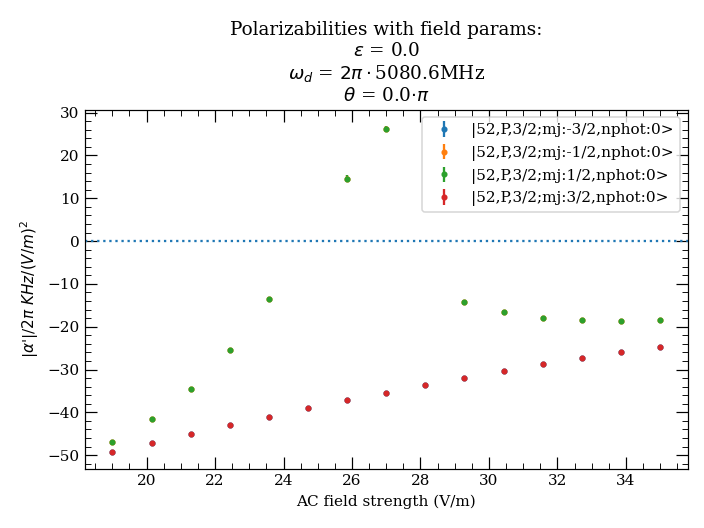

In [31]:
fig, ax = plt.subplots(1,1)
for i, state in enumerate(basis):
    if state == t_level:  # check n,l,j quantum numbers
        ax.errorbar(Eacs, alphas[:,n_max*len(basis)+i]*1e-3/tau, label=basis_n[n_max*len(basis)+i].ket(),yerr=dalphas[:,n_max*len(basis)+i]*1e-3/tau,fmt=".")
ax.legend()
ax.axhline(0,ls=":")
#ax.set_ylim(0,max(np.abs(alphas[0,:]))*1e-3/tau)
#ax.set_yscale("log")
ax.set_xlabel("AC field strength (V/m)")
ax.set_ylabel("|$\\alpha$'|/$2\pi$ $KHz/(V/m)^2$")
ax.set_title(f"Polarizabilities with field params:\n$\epsilon$ = {ellipticity}\n$\omega_d$ = $2\pi \cdot${field_omega*1e-6/tau:.1f}MHz\n$\\theta$ = {theta/pi}$\cdot\pi$")
fig.tight_layout()
fig.show()
omega_for_humans = int(field_omega*1e-6/tau)
fig.savefig(f"polarizabilities_omegad-{omega_for_humans}MHz_eps_{ellipticity:.3f}-around16Eac.png")

# Plot_1Ds
## plot all relevant Energies and one overlap

<IPython.core.display.Javascript object>


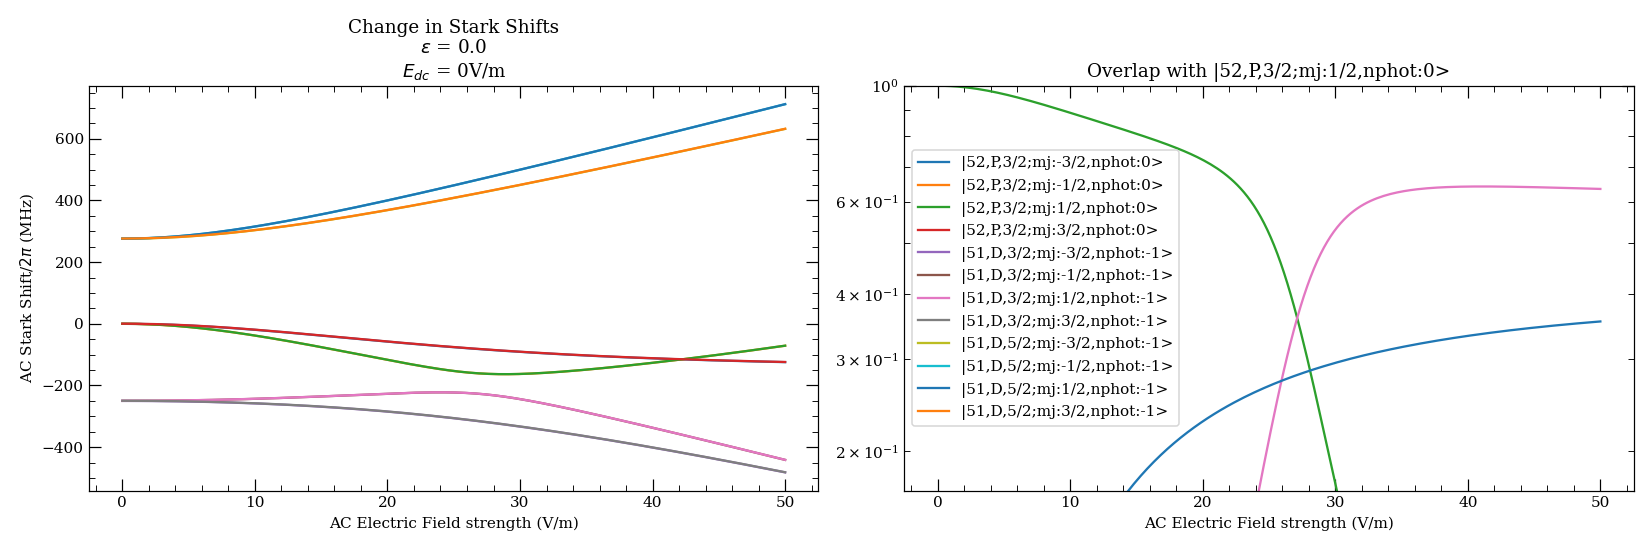

In [21]:
thrs = 0.21  # threshold for caring about population
fig,axar = plt.subplots(1,2,figsize=(15,5))
iis = []
interesting_inds = []
for i, state in enumerate(basis):
#    if [state.n,state.l,state.j,state["mj"]] == [t_level.n, t_level.l, t_level.j,3/2]:
    if [state.n,state.l,state.j] == [t_level.n, t_level.l, t_level.j]:
        iis.append(i+len(basis)*n_max)
for ii in iis:
    for k, p in enumerate(eigenstates[:,ii,:]):
        if max(np.absolute(p)**2)>thrs:
            interesting_inds.append(k)
interesting_inds = list(set(interesting_inds))
for k in interesting_inds:
    if theta_list is None:
        axar[0].plot(varied[1], 1e-6*np.real(energies[k,:]-0*energies[k,0])/tau, label=basis_n[k].ket())
        axar[1].plot(varied[1], np.absolute(eigenstates[k,ii-1,:])**2, label=basis_n[k].ket())
    else:
        axar[0].plot(varied[1]/pi, 1e-6*np.real(energies[k,:]-0*energies[k,0])/tau, label=basis_n[k].ket())
        axar[1].plot(varied[1]/pi, np.absolute(eigenstates[k,ii,:])**2, label=basis_n[k].ket())
    #print(f"state = {basis[k%len(basis)].ket()}, dE = 2pix{1e-6*np.real(Energies[k,-1]-Energies[k,0])/tau}MHz")
axar[0].set_title("Change in Stark Shifts\n$E_{ac}$ = "+f"{Eac}V/m\n" + "$E_{dc}$ = " + f"{Edc}V/m")
#axar[0].set_ylim(-1e3,6e3)
axar[1].set_title(f"Overlap with {basis_n[ii-1].ket()}")
axar[1].set_yscale("log")
axar[1].set_ylim(thrs*0.8,1)
axar[1].legend()
if Edc_list is not None:
    axar[0].set_ylabel("DC Stark Shift/$2\pi$ (MHz)")
    axar[0].set_xlabel("DC Electric Field strength (V/m)")
    axar[1].set_xlabel("DC Electric Field strength (V/m)")
elif Eac_list is not None:
    axar[0].set_title("Change in Stark Shifts\n$\epsilon$ = "+f"{ellipticity}\n" + "$E_{dc}$ = " + f"{Edc}V/m")
    axar[0].set_ylabel("AC Stark Shift/$2\pi$ (MHz)")
    axar[0].set_xlabel("AC Electric Field strength (V/m)")
    axar[1].set_xlabel("AC Electric Field strength (V/m)")
elif theta_list is not None:
    axar[0].set_ylabel("Change in DC Stark Shift/$2\pi$ (MHz)")
    axar[0].set_xlabel("$\\theta/\pi$ (radians)")
    axar[1].set_xlabel("Angle Between AC and DC fields/$\pi$/ (radians)")
#axar[1].legend()
fig.tight_layout()
fig.show()

## Fit to quadratic shifts, compare to alphas

|51,D,5/2;mj:3/2,nphot:-1>
|52,P,3/2;mj:3/2,nphot:0>
|51,D,3/2;mj:3/2,nphot:-1>
state |51,D,5/2;mj:3/2,nphot:-1> has polarizability fits:
	 [4.53441538e+05 2.47747250e+09]
	 [6.68940147e+03 4.32410569e+07]


<IPython.core.display.Javascript object>


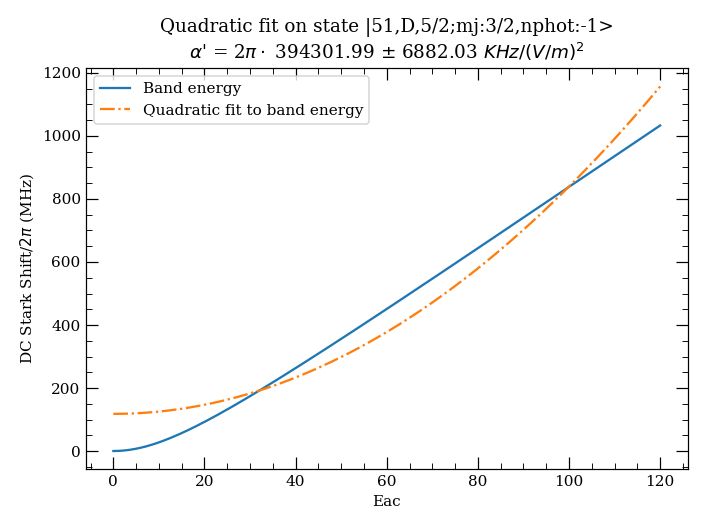

state |52,P,3/2;mj:3/2,nphot:0> has polarizability fits:
	 [-4.69313209e+04 -4.57358677e+08]
	 [3.14105053e+03 2.03041102e+07]


<IPython.core.display.Javascript object>


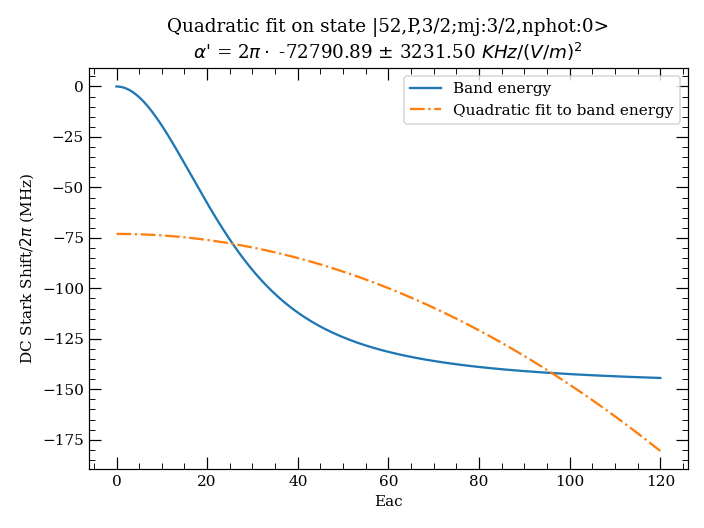

state |51,D,3/2;mj:3/2,nphot:-1> has polarizability fits:
	 [-4.06514950e+05 -1.85135867e+09]
	 [3.88316397e+03 2.51012165e+07]


<IPython.core.display.Javascript object>


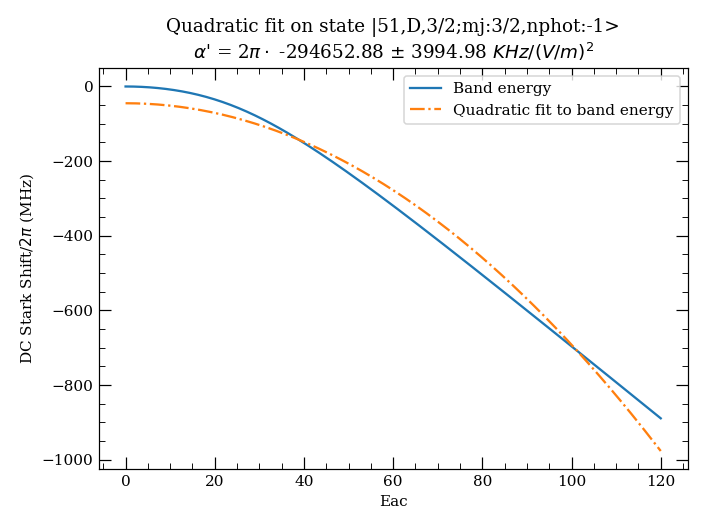

In [27]:
quad = lambda v, alpha, e0: alpha*(v-0)**2+e0
interesting_inds = list(set(interesting_inds))
    
dim = len(basis_n)
#alphas = np.zeros(dim, dtype=float)
#dalphas = np.zeros(dim, dtype=float)
print("\n".join(basis_n[k].ket() for k in interesting_inds))
for k in interesting_inds:
    band_energies = energies[k,:]
    guess = guess = [(band_energies[-1]-band_energies[len(varied[1])//2])/varied[1][-1], band_energies[0]]
    try:
        popt, pcov = curve_fit(quad, varied[1], band_energies, p0 = guess)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        popt = [np.NaN]*len(guess)
        perr = popt
    print(f"state {basis_n[k].ket()} has polarizability fits:\n\t {popt}\n\t {perr}")
    
    fig,ax = plt.subplots(1,1)
    ax.plot(varied[1],(band_energies - band_energies[0])*1e-6/tau, label = "Band energy")
    ax.plot(varied[1], (quad(varied[1],*popt)-band_energies[0])*1e-6/tau, ls="-.", label = "Quadratic fit to band energy")
    #ax.plot(varied[1], (quad(varied[1],popt[0], alphas[k], popt[2])-band_energies[0])*1e-6/tau, ls = ":", label = "fit from alphas")
    ax.legend()
    ax.set_xlabel(varied[0])
    ax.set_ylabel("DC Stark Shift/$2\pi$ (MHz)")
    ax.set_title(f"Quadratic fit on state {basis_n[k].ket()}\n$\\alpha$' = 2$\pi \cdot$ {popt[1]*1e-3/tau:.2f} $\pm$ {perr[1]*1e-3/tau:.2f} $KHz/(V/m)^2$")# \n$\\alpha$'2 = 2$\pi \cdot$ {alphas[k]*1e-3/tau:.2f} $\pm$ {dalphas[k]*1e-3/tau:.2f} $KHz/(V/m)^2$")
    fig.tight_layout()
    fig.show()

## Plot Energies for each relevant m_j

<IPython.core.display.Javascript object>


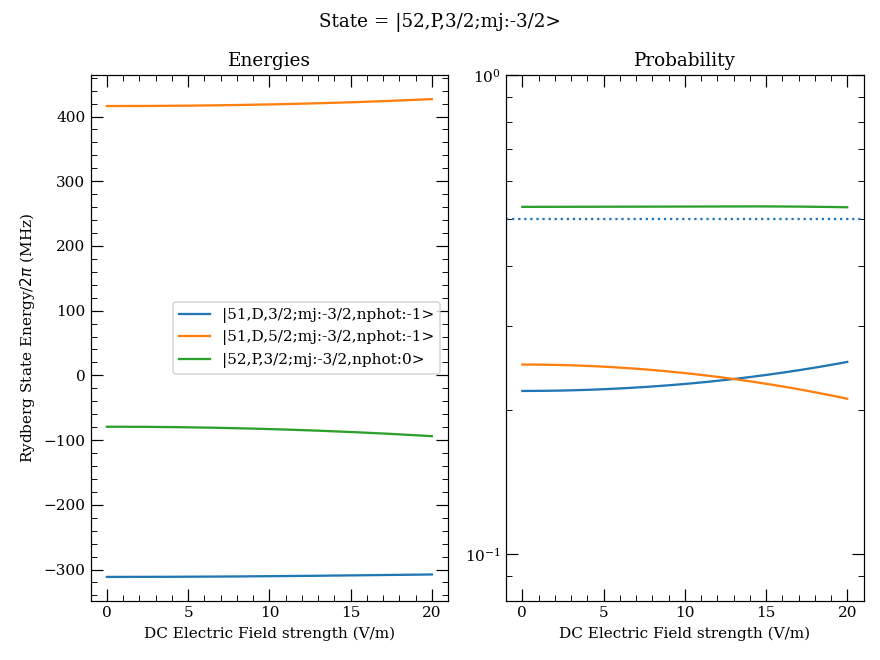

<IPython.core.display.Javascript object>


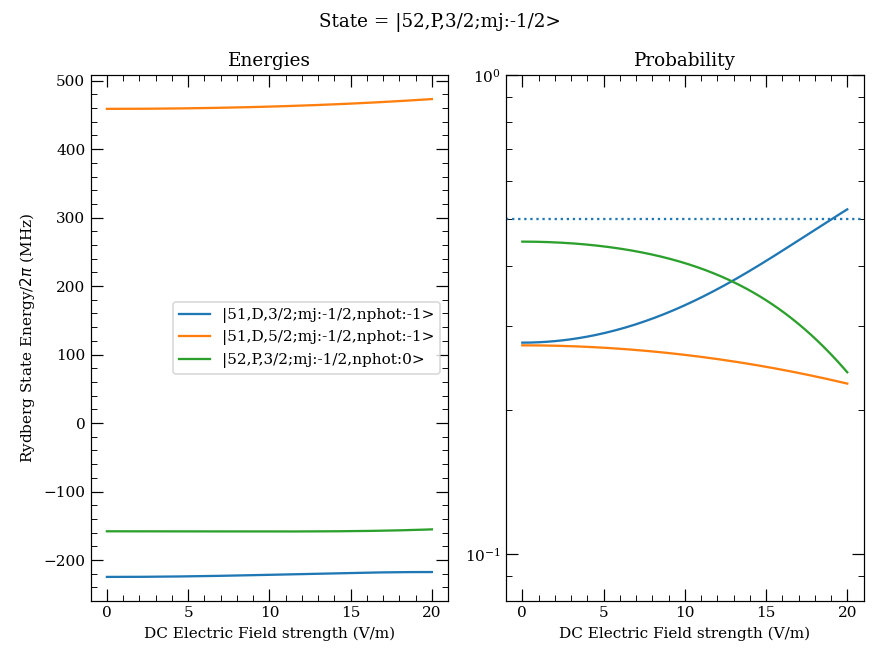

<IPython.core.display.Javascript object>


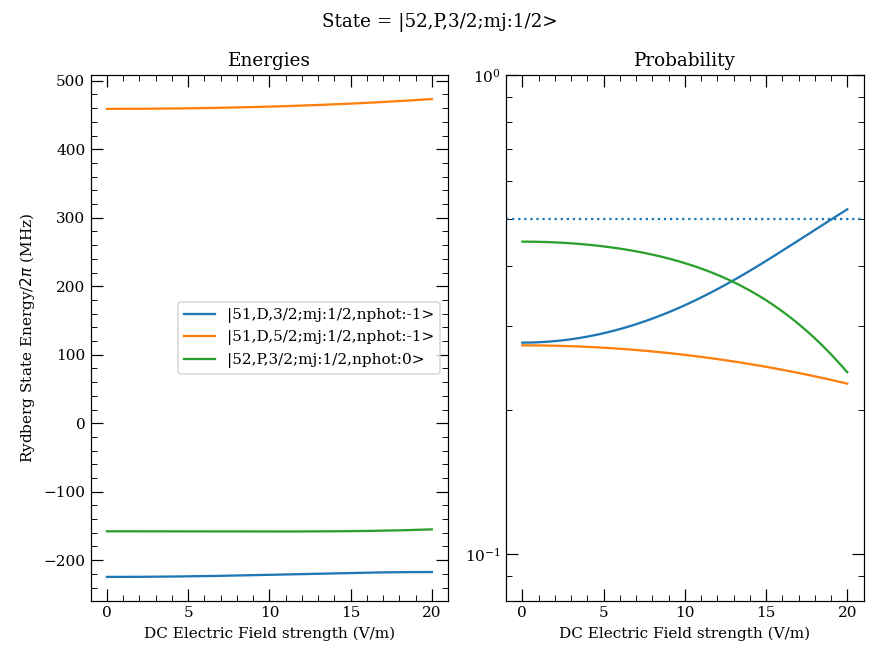

<IPython.core.display.Javascript object>


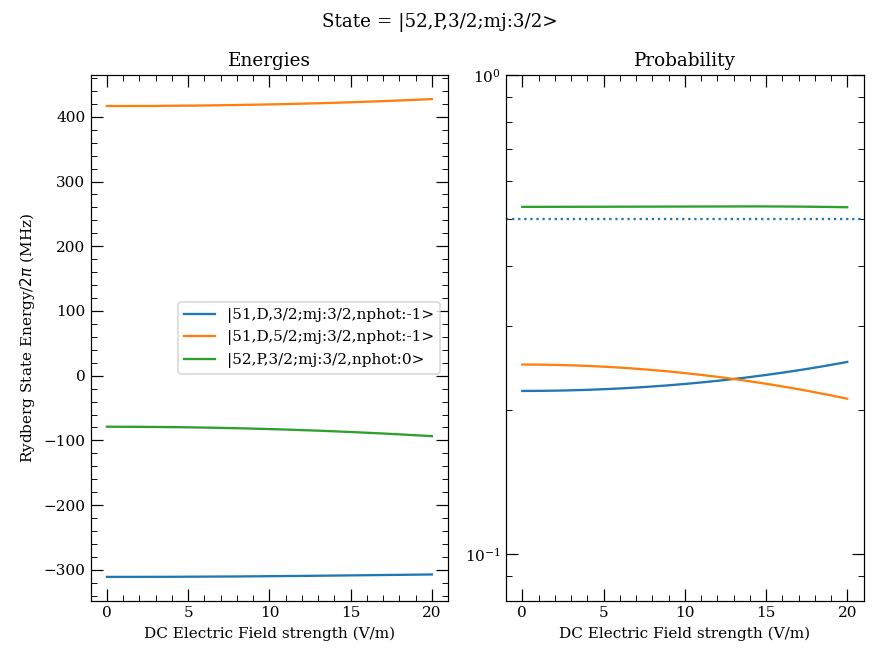

In [28]:
thrs = 1e-1  # threshold for caring about population
look_at = t_level
#look_at = RydStateFS(51,2,5/2)
for i, state in enumerate(basis):
    if state == look_at:
        interesting_inds = []
        #print(state.ket())
        ii = i+len(basis)*n_max
        #print(ii)
        for k, p in enumerate(eigenstates[:,ii,:]):
            #check 
            #print(k)
            if max(np.absolute(p)**2)>thrs:
                interesting_inds.append(k)
                #print(f"index {k} is interesting")
                #print(f"corresponds to {basis_n[k].ket()}")
                #print(f"{p}")
                #print(max(p))
            #print(k,p.shape,p[1:].max())
        fig,axar = plt.subplots(1,2,figsize=(8,6))
        for k in interesting_inds:
            axar[0].plot(varied[1], 1e-6*np.real(energies[k,:])/tau, label=basis_n[k].ket())
            axar[1].plot(varied[1], np.absolute(eigenstates[k,ii,:])**2, label=basis_n[k].ket())
        axar[0].set_title("Energies")
        #axar[0].set_ylim(-1e3,6e3)
        axar[1].axhline(0.5,ls=":")
        axar[1].set_title("Probability")
        axar[1].set_yscale("log")
        axar[1].set_ylim(thrs*0.8,1)
        axar[0].legend()
        axar[0].set_ylabel("Rydberg State Energy/$2\pi$ (MHz)")
        if Edc_list is not None:
            axar[0].set_xlabel("DC Electric Field strength (V/m)")
            axar[1].set_xlabel("DC Electric Field strength (V/m)")
        elif Eac_list is not None:
            axar[0].set_xlabel("AC Electric Field strength (V/m)")
            axar[1].set_xlabel("AC Electric Field strength (V/m)")
        #axar[1].legend()
        fig.suptitle(f"State = {state.ket()}")
        fig.tight_layout()
        fig.show()

## Plot Relative Shifts for each relevant m_j

<IPython.core.display.Javascript object>


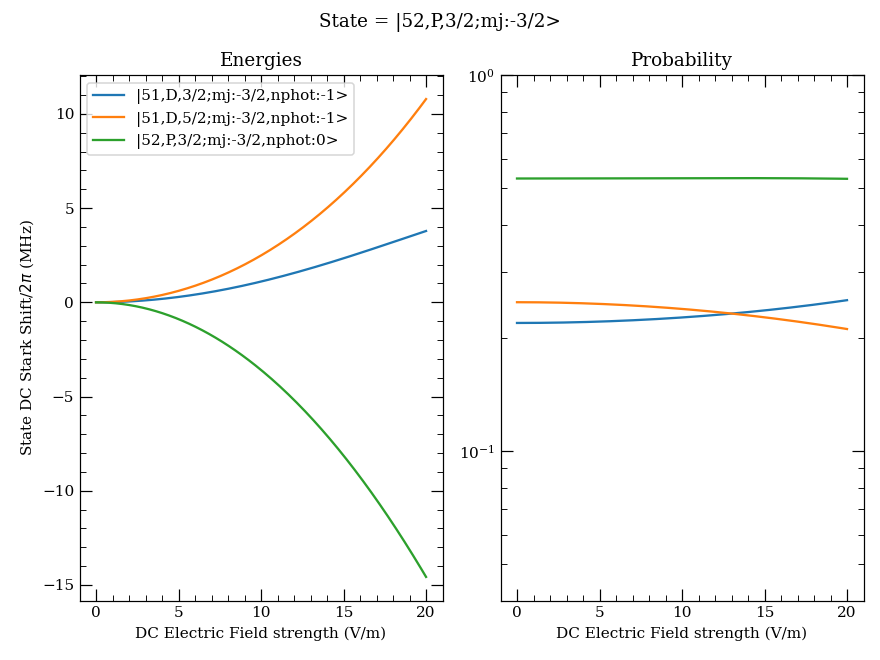

<IPython.core.display.Javascript object>


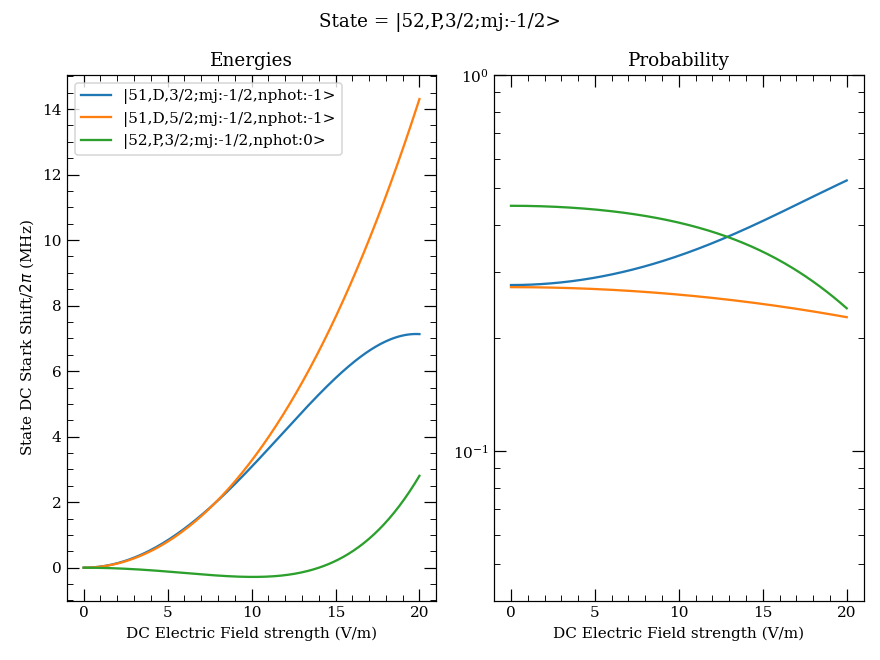

<IPython.core.display.Javascript object>


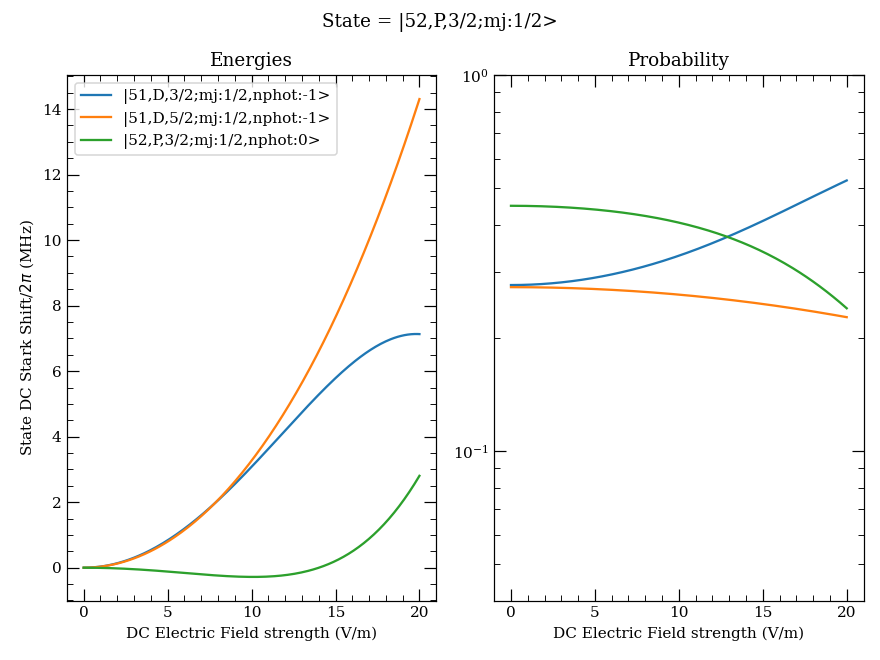

<IPython.core.display.Javascript object>


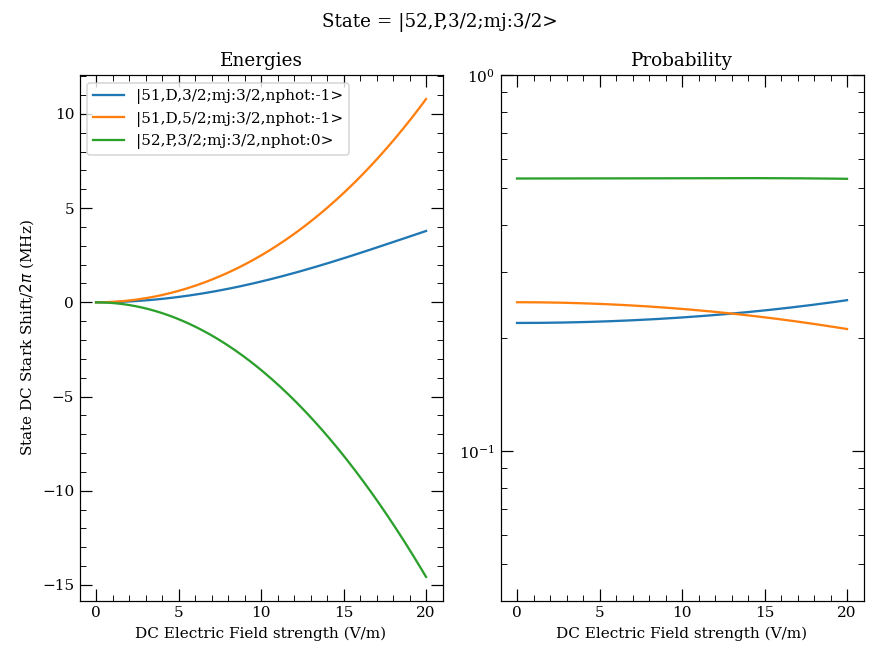

In [27]:
thrs = 5e-2  # threshold for caring about population
look_at = t_level
#look_at = RydStateFS(51,2,5/2)
for i, state in enumerate(basis):
    if state == look_at:
        interesting_inds = []
        #print(state.ket())
        ii = i+len(basis)*n_max
        #print(ii)
        for k, p in enumerate(eigenstates[:,ii,:]):
            #check 
            #print(k)
            if max(np.absolute(p)**2)>thrs:
                interesting_inds.append(k)
                #print(f"index {k} is interesting")
                #print(f"corresponds to {basis_n[k].ket()}")
                #print(f"{p}")
                #print(max(p))
            #print(k,p.shape,p[1:].max())
        fig,axar = plt.subplots(1,2,figsize=(8,6))
        for k in interesting_inds:
            axar[0].plot(varied[1], 1e-6*np.real(energies[k,:]-energies[k,0])/tau, label=basis_n[k].ket())
            axar[1].plot(varied[1], np.absolute(eigenstates[k,ii,:])**2, label=basis_n[k].ket())
        axar[0].set_title("Energies")
        #axar[0].set_ylim(-1e3,6e3)
        axar[1].set_title("Probability")
        axar[1].set_yscale("log")
        axar[1].set_ylim(thrs*0.8,1)
        axar[0].legend()
        axar[0].set_ylabel("State DC Stark Shift/$2\pi$ (MHz)")
        if Edc_list is not None:
            axar[0].set_xlabel("DC Electric Field strength (V/m)")
            axar[1].set_xlabel("DC Electric Field strength (V/m)")
        elif Eac_list is not None:
            axar[0].set_xlabel("AC Electric Field strength (V/m)")
            axar[1].set_xlabel("AC Electric Field strength (V/m)")
        #axar[1].legend()
        fig.suptitle(f"State = {state.ket()}")
        fig.tight_layout()
        fig.show()

# Debugging

In [1]:
H_floquet = build_floquet(basis,H0,Eac,0.02,field_omega,Edc_list[-1],pi/2,n_max)
H_floquet = H_floquet - np.diag(np.diag(H_floquet))
fig,ax = plt.subplots(1,1)
ax.imshow(np.real(H_floquet[(n_max-1)*len(basis):(n_max+1)*len(basis),(n_max-1)*len(basis):(n_max+1)*len(basis)]))
fig.show()

NameError: name 'build_floquet' is not defined

In [21]:
detuning(RydStateFS(51,2,5/2),RydStateFS(51,2,3/2),0)*1e-9/tau

0.5261405514891145